### LEVEL 1: Burst Detection and Population Metrics
        Goals:
                (1) Detect population bursts with RMS-based methods in this sequence:
                        - Bin all spikes into a population firing rate
                        - Smooth to reveal coherent activity
                        - Apply RMS threshold to detect peaks (bursts)
                        - Mark burst windows from rise to fall
                        - Return the smoothed trace, burst peaks, and burst windows
                        - Store time points of start and end indices and peaks of avg (container)
                        - Compute and push burst metrics to DataFrame and CSV/Pickle
                (2) Detect sub-population bursting with unit-wise thresholding (dim and isi methods) 
                        - Map burst classes to 'Sample' column in DataFrame as groups
                        - Compute and store appropriate metrics under each class
                (3) Organize and store the above data for easy import into LEVEL 2 notebook
        

In [39]:
# List all _acqm.zip files that have not been downloaded to ~bioinformatics/data

from burst_analysis.loading import SpikeDataLoader

uuids = [
    "2025-07-05-e-KOLF2.2J_D95_SmitsMidbrain_6OHDA_T2_72hrs/derived/kilosort2",
    "2025-07-27-e-MaxTwo_H9SynGFP_SmitsMidbrain_T2_48hr_72hr_D4_D5_D6/derived/kilosort2",
    "2025-07-27-e-MaxTwo_H9SynGFP_SmitsMidbrain_T2_48hr_72hr_D4_D5_D6/derived/kilosort2",
    "2025-07-27-e-MaxTwo_H9SynGFP_SmitsMidbrain_T2_48hr_72hr_D4_D5_D6/derived/kilosort2",
    "2025-07-27-e-MaxTwo_H9SynGFP_SmitsMidbrain_T2_48hr_72hr_D4_D5_D6/derived/kilosort2",
    "2025-07-27-e-MaxTwo_H9SynGFP_SmitsMidbrain_T2_48hr_72hr_D4_D5_D6/derived/kilosort2",
    "2025-07-27-e-MaxTwo_H9SynGFP_SmitsMidbrain_T2_48hr_72hr_D4_D5_D6/derived/kilosort2",
    "2025-07-27-e-MaxTwo_H9SynGFP_SmitsMidbrain_T2_48hr_72hr_D4_D5_D6/derived/kilosort2",
    "2025-07-27-e-MaxTwo_H9SynGFP_SmitsMidbrain_T2_48hr_72hr_D4_D5_D6/derived/kilosort2",
    "2025-07-27-e-MaxTwo_H9SynGFP_SmitsMidbrain_T2_48hr_72hr_D4_D5_D6/derived/kilosort2",
    "2025-07-27-e-MaxTwo_H9SynGFP_SmitsMidbrain_T2_48hr_72hr_D4_D5_D6/derived/kilosort2"
]

zip_keys = SpikeDataLoader.list_zips_on_s3(uuids)
for key in zip_keys:
    print(key)

KeyboardInterrupt: 

In [41]:
# Download new _acqm.zip files into ~bioinformatics/data

from burst_analysis.loading import SpikeDataLoader
uuids = [
    "2025-07-27-e-MaxTwo_H9SynGFP_SmitsMidbrain_T2_48hr_72hr_D4_D5_D6"
]

SpikeDataLoader.fetch_zips_from_s3(
    uuid_list=uuids,
    local_dir="/Users/main_mac/bioinformatics/data"
)

[SKIP] M06943b_H9SynGFP_D45_7272025_6OHDA_T2_48hr_well000_acqm.zip already exists
[SKIP] M06943b_H9SynGFP_D45_7272025_6OHDA_T2_48hr_well001_acqm.zip already exists
[SKIP] M06943b_H9SynGFP_D45_7272025_6OHDA_T2_48hr_well002_acqm.zip already exists
[SKIP] M06943b_H9SynGFP_D45_7272025_6OHDA_T2_48hr_well003_acqm.zip already exists
[SKIP] M06943b_H9SynGFP_D45_7272025_6OHDA_T2_48hr_well004_acqm.zip already exists
[SKIP] M06943b_H9SynGFP_D45_7272025_6OHDA_T2_48hr_well005_acqm.zip already exists


In [2]:
from pathlib import Path

# Initialize loader with a valid directory
loader = SpikeDataLoader(npz_dir="/Users/main_mac/bioinformatics/data")

# Extract and label files
extracted_files = loader.extract_and_label_zips(
    base_folder=Path("/Users/main_mac/bioinformatics/data"),
    target_subdir="extracted",
    label_parts=(0, 1, 2, 3, 4, 5)
)

# Display extracted file mapping
extracted_files


Renamed qm.npz -> M06943b_H9SynGFP_D45_7272025_6OHDA_T2.npz
Renamed qm.npz -> M06943b_H9SynGFP_D45_7272025_6OHDA_T2.npz
Renamed qm.npz -> M06943b_H9SynGFP_D45_7272025_6OHDA_T2.npz
Renamed qm.npz -> M06943b_H9SynGFP_D45_7272025_6OHDA_T2.npz
Renamed qm.npz -> M06943b_H9SynGFP_D45_7272025_6OHDA_T2.npz
Renamed qm.npz -> M06943b_H9SynGFP_D45_7272025_6OHDA_T2.npz
Extraction complete


{'M06943b_H9SynGFP_D45_7272025_6OHDA_T2': '/Users/main_mac/bioinformatics/data/extracted/M06943b_H9SynGFP_D45_7272025_6OHDA_T2.npz'}

In [3]:
# Extract _acqm.zip files from ~bioinformatics/data into ~bioinformatics/data/extracted/maxone_run1 (run = a collection of samples in round of PD induction)
from pathlib import Path
from burst_analysis.loading import SpikeDataLoader
# Initialize loader
loader = SpikeDataLoader(npz_dir=None)

# Define base folder and target subdirectory
base_folder = Path("bioinformatics/data")

# Run extraction and labeling
extracted_files = loader.extract_and_label_zips(
    base_folder=base_folder,
    target_subdir="extracted",
    label_parts=(0, 1, 2, 3, 4, 5, 6, 7, 8)  # adjust based on filename structure
)

# Display mapping of labels to extracted file paths
extracted_files


No .zip files found in bioinformatics/data


{}

In [11]:
# --- Set up imports and paths ---
import sys
from pathlib import Path
import pandas as pd

# Set the project root so Python can find analysis_libs and others
project_root = Path("~/bioinformatics").expanduser().resolve()
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

# Define the data directory
data_path = project_root / "data/extracted/maxtwo_H9SynGFP"
# Import burst analysis tools
from burst_analysis.loading import SpikeDataLoader
from burst_analysis.detection import BurstDetection
from burst_analysis.plotting import BurstDetectionPlots

In [ ]:
# Load 

data_path = Path("~/bioinformatics/data/extracted/maxtwo_H9SynGFP").expanduser()
from burst_analysis.loading import SpikeDataLoader
from projects.parkinsons import OrchestratorPDx2

orc = OrchestratorPDx2()
print("Datasets loaded:", orc.list_datasets())

Switched to dataset: d0s2_Control
Set d0s2_Control as default dataset.
Datasets loaded: ['d0s2_Control', 'd0s6_Treated', 'd6s2_Control', 'd6s6_Treated']


In [14]:
from projects.parkinsons.coordinator import OrchestratorPDx2
from pathlib import Path

folder = Path("/Users/main_mac/bioinformatics/data/extracted/maxtwo_H9SynGFP")
spike_paths = {f.stem: str(f) for f in folder.glob("*.npz")}

orc = OrchestratorPDx2(spike_paths=spike_paths)
print("Datasets loaded:", orc.list_datasets())


Switched to dataset: M08754bs5_H9SynGFP_D43_CONTROL_T2_3hr
Set 'M08754bs5_H9SynGFP_D43_CONTROL_T2_3hr' as default dataset (first available).
Datasets loaded: ['M08754bs5_H9SynGFP_D43_CONTROL_T2_3hr', 'M06943bs2_H9SynGFP_D43_175µM_T1_24hr', 'M06943bs4_H9SynGFP_D43_175µM_T2_3hr', 'M06943bs4_H9SynGFP_D43_175µM_T1_24hr', 'M08754bs4_H9SynGFP_D44_CONTROL_T2_24hr', 'M06943bs5_H9SynGFP_D45_175µM_T2_48hr', 'M06943bs3_H9SynGFP_D43_175µM_T2_3hr', 'M08754bs6_H9SynGFPMO_D42_CONTROL_T1_3hrs', 'M08754bs5_H9SynGFP_D43_CONTROL_T1_24hr', 'M08754bs3_H9SynGFPMO_D42_CONTROL_BASELINE_0hr', 'M06943bs3_H9SynGFP_D45_175µM_T2_48hr', 'M08754bs2_H9SynGFPMO_D42_CONTROL_BASELINE_0hr', 'M06943bs4_H9SynGFPMO_D42_175µM_T1_3hrs', 'M06943bs1_H9SynGFP_D44_175µM_T2_24hr', 'M06943bs5_H9SynGFP_D43_175µM_T1_24hr', 'M06943bs4_H9SynGFPMO_D42_175µM_BASELINE_0hr', 'M06943bs3_H9SynGFPMO_D42_175µM_T1_3hrs', 'M06943bs5_H9SynGFPMO_D42_175µM_BASELINE_0hr', 'M06943bs6_H9SynGFPMO_D42_175µM_BASELINE_0hr', 'M06943bs3_H9SynGFP_D43_175µM_T

In [15]:
from projects.parkinsons.coordinator import OrchestratorPDx2

orc = OrchestratorPDx2()
print("Orchestrator initialized.")
print("Available dataset keys:", orc.list_datasets())

Switched to dataset: d0s2_Control
Set d0s2_Control as default dataset.
Orchestrator initialized.
Available dataset keys: ['d0s2_Control', 'd0s6_Treated', 'd6s2_Control', 'd6s6_Treated']


In [16]:
datasets = list(orc.spike_data.keys())
print(datasets)

['d0s2_Control', 'd0s6_Treated', 'd6s2_Control', 'd6s6_Treated']


In [18]:
import pandas as pd
import json
from pathlib import Path

csv_path = Path("~/bioinformatics/projects/parkinsons/metrics.csv").expanduser()

def safe_json_load(x):
    """Safely loads JSON strings, returns original if parsing fails."""
    if isinstance(x, str):
        x = x.strip()
        if x.startswith("[") and x.endswith("]"):
            try:
                return json.loads(x)
            except json.JSONDecodeError:
                return x
    return x

# Load existing CSV if available
if csv_path.exists():
    metrics_df = pd.read_csv(csv_path)
    for col in metrics_df.columns:
        if metrics_df[col].dtype == "object":
            metrics_df[col] = metrics_df[col].apply(safe_json_load)
    print(f"Loaded {len(metrics_df)} records from {csv_path}")
else:
    metrics_df = pd.DataFrame()
    print("No saved metrics.csv found — starting fresh.")

Loaded 120 records from /Users/main_mac/bioinformatics/projects/parkinsons/metrics.csv


In [19]:
def append_metrics_record(record):
    global metrics_df

    # Reload CSV if DataFrame empty
    if (metrics_df is None or metrics_df.empty) and csv_path.exists():
        metrics_df = pd.read_csv(csv_path)
        for col in metrics_df.columns:
            if metrics_df[col].dtype == "object":
                metrics_df[col] = metrics_df[col].apply(safe_json_load)

    # Append record
    new_df = pd.DataFrame([record])
    metrics_df = pd.concat([metrics_df, new_df], ignore_index=True)

    # Convert lists to JSON before saving
    df_to_save = metrics_df.copy()
    for col in ["peak_times", "burst_windows"]:
        if col in df_to_save.columns:
            df_to_save[col] = df_to_save[col].apply(lambda x: json.dumps(x) if isinstance(x, (list, tuple)) else x)

    df_to_save.to_csv(csv_path, index=False)
    print(f"Saved {len(metrics_df)} total records to {csv_path}")

In [24]:
from projects.parkinsons.coordinator import OrchestratorPDx2
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import VBox, HBox, FloatSlider, IntSlider, Dropdown, Button, Output

spike_path = Path("~/bioinformatics/data/extracted//maxtwo_H9SynGFP").expanduser()
orc = OrchestratorPDx2(spike_path)

bin_size_ms_slider = FloatSlider(value=10, min=1, max=20, step=1, description="BinSize (ms)")
threshold_slider = FloatSlider(min=1, max=5, step=0.1, value=3.0, description="RMSThresh")
edge_slider = FloatSlider(min=0.05, max=0.5, step=0.01, value=0.1, description="EdgeThresh")
gauss_slider = IntSlider(min=1, max=200, step=2, value=100, description="Gaussian")
square_slider = IntSlider(min=1, max=100, step=2, value=20, description="Square")
min_dist_slider = IntSlider(min=100, max=5000, step=50, value=300, description="MinDist")
time_start_slider = IntSlider(min=0, max=1800, step=10, value=0, description="Start(s)")
window_slider = IntSlider(min=10, max=510, step=5, value=120, description="Duration(s)")

dataset_dropdown = Dropdown(options=orc.list_datasets(), value=orc.list_datasets()[2], description='Dataset:')
run_button = Button(description="Update Plot", button_style="success")
out = Output()


Switched to dataset: M06943bs1_H9SynGFPMO_D42_175µM_BASELINE_0hr
Set 'M06943bs1_H9SynGFPMO_D42_175µM_BASELINE_0hr' as default dataset (first available).


In [25]:
def update_plot(change=None):
    with out:
        out.clear_output()
        try:
            plt.close('all')

            dataset = dataset_dropdown.value
            time_start = time_start_slider.value
            time_window = window_slider.value

            config = {
                "bin_size_ms": bin_size_ms_slider.value,
                "threshold_rms": threshold_slider.value,
                "burst_edge_fraction": edge_slider.value,
                "gauss_win_ms": gauss_slider.value,
                "square_win_ms": square_slider.value,
                "min_dist_ms": min_dist_slider.value,
                "time_start": time_start,
                "time_window": time_window
            }

            time_range = (time_start, time_start + time_window)

            print(f"Selected dataset: {dataset}")
            print(f"Time range: {time_range}")
            print(f"Config: {config}")

            # Run orchestrator
            orc.compute_and_plot_population_bursts(
                dataset_keys=[dataset],
                config=config,
                time_range=time_range,
                save=False
            )

            latest_df = orc.burst_detection_metrics_df
            if latest_df.empty:
                print("No metrics generated.")
                return

            # === Take the full transient row ===
            latest = latest_df[latest_df["Sample"] == dataset].iloc[-1].to_dict()

            if latest.get("duration_s", 0) == 0:
                print("No spikes in selected time window. Try another dataset.")
                return

            # Print key burst summary
            print(f"\nBurst Extraction Summary — {dataset}")
            print(f"Recording duration: {latest['duration_s']:.2f} s")
            print(f"Total spikes: {latest['n_total_spikes']}")
            print(f"Number of neurons: {latest['n_neurons']}")
            print(f"Mean firing rate per neuron: {latest['mean_rate_per_neuron']:.2f} Hz")
            if latest["n_total_bursts"] > 0:
                print(f"Bursts detected: {latest['n_total_bursts']}")
                print(f"Mean burst duration: {latest['mean_burst_dur']:.3f} s")
                print(f"Std of burst durations: {latest['std_burst_dur']:.3f} s")
                print(f"Burst rate: {latest['burst_rate_per_min']:.2f} bursts/min")
                if latest["mean_IBI"]:
                    print(f"Mean inter-burst interval (IBI): {latest['mean_IBI']:.2f} s")

            # Merge transient metrics and config
            record = {**latest, **config, "Sample": dataset}

            # Find match
            global metrics_df
            match_idx = None
            for idx, existing in metrics_df.iterrows():
                if all(existing.get(k) == record[k] for k in ["Sample", "bin_size_ms", "threshold_rms", 
                                                               "burst_edge_fraction", "gauss_win_ms", 
                                                               "square_win_ms", "min_dist_ms", 
                                                               "time_start", "time_window"]):
                    match_idx = idx
                    break

            if match_idx is not None:
                metrics_df.loc[match_idx] = record
                print("Updated existing record.")
            else:
                append_metrics_record(record)
                print("Added new record.")

        except Exception as e:
            import traceback
            traceback.print_exc()
            print(f"Error during update_plot: {e}")

# Hook up the run button
run_button.on_click(update_plot)

ui = VBox([
    HBox([dataset_dropdown, run_button]),
    HBox([bin_size_ms_slider, threshold_slider, edge_slider]),
    HBox([gauss_slider, square_slider, min_dist_slider]),
    HBox([time_start_slider, window_slider]),
    out
])
display(ui)

In [26]:
import pandas as pd

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows
pd.set_option('display.width', 1000)        # Expand display width
pd.set_option('display.colheader_justify', 'left')  # Align headers left

print(metrics_df.to_string())


    Sample                                   bin_size_ms  threshold_rms  burst_edge_fraction  gauss_win_ms  square_win_ms  min_dist_ms  time_start  time_window  total_spikes  duration_s  n_neurons  mean_rate_per_neuron  n_bursts  mean_burst_duration  std_burst_duration  burst_rate_per_min  mean_ibi  peak_times                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [27]:
import pandas as pd

df_check = pd.read_csv(csv_path)
print("Columns in saved CSV:", df_check.columns.tolist())
print("Last saved row:")
display(df_check.tail(1).T)


Columns in saved CSV: ['Sample', 'bin_size_ms', 'threshold_rms', 'burst_edge_fraction', 'gauss_win_ms', 'square_win_ms', 'min_dist_ms', 'time_start', 'time_window', 'total_spikes', 'duration_s', 'n_neurons', 'mean_rate_per_neuron', 'n_bursts', 'mean_burst_duration', 'std_burst_duration', 'burst_rate_per_min', 'mean_ibi', 'peak_times', 'burst_windows', 'n_total_spikes', 'n_total_bursts', 'mean_burst_dur', 'std_burst_dur', 'mean_IBI', 'n_pop_bursts_window', 'avg_peakFR_per_unit_window', 'avg_peakFR_per_unit_bin', 'n_bursts_at_time_0', 'mean_peakFR_at_time_0', 'std_peakFR_at_time_0', 'mean_burst_duration_at_time_0', 'std_burst_duration_at_time_0', 'mean_width_lead', 'std_width_lead', 'mean_width_lag', 'std_width_lag', 'mean_total_width', 'dataset_key']
Last saved row:


119                                               
Sample                                         25168c_KOLFMO_D92_CONTROL_T1_24hr
bin_size_ms                                                                  5.0
threshold_rms                                                                1.7
burst_edge_fraction                                                          0.5
gauss_win_ms                                                                17.0
square_win_ms                                                                5.0
min_dist_ms                                                               1950.0
time_start                                                                   0.0
time_window                                                                 45.0
total_spikes                                                                 NaN
duration_s                                                               600.985
n_neurons                                                                  310.0
mean_rate_per_neuron                                                    2.941123
n_bursts                                                                     NaN
mean_burst_duration                                                          NaN
std_burst_duration                                                           NaN
burst_rate_per_min                                                     14.376399
mean_ibi                                                                     NaN
peak_times                     [1.28, 6.79, 9.965, 12.98, 15.0, 18.195, 21.49...
burst_windows                  [[1.105, 1.56], [6.51, 6.92], [9.88, 10.185], ...
n_total_spikes                                                          547947.0
n_total_bursts                                                             144.0
mean_burst_dur                                                          0.403576
std_burst_dur                                                           0.153819
mean_IBI                                                                4.191678
n_pop_bursts_window                                                         11.0
avg_peakFR_per_unit_window                                            213.114754
avg_peakFR_per_unit_bin                                               213.114754
n_bursts_at_time_0                                                          11.0
mean_peakFR_at_time_0                                                  10.407208
std_peakFR_at_time_0                                                    1.608208
mean_burst_duration_at_time_0                                           0.354545
std_burst_duration_at_time_0                                            0.144276
mean_width_lead                                                         0.142273
std_width_lead                                                          0.105494
mean_width_lag                                                          0.212273
std_width_lag                                                           0.123332
mean_total_width                                                        0.354545
dataset_key                                                                  NaN

In [28]:
import csv

filepath = "Users/main_mac/bioinformatics/projects/parkinsons/metrics.csv"
def load_csv(filepath):
    """Load a CSV file into a list of rows (each row is a list of values)."""
    with open(filepath, newline='', encoding='utf-8') as f:
        reader = csv.reader(f)
        data = list(reader)
    return data
def print_csv(data):
    """Print CSV data as a full table with proper spacing for all columns."""
    # Calculate column widths
    col_widths = [max(len(str(item)) for item in col) for col in zip(*data)]

    # Print each row with spacing
    for row in data:
        print(" | ".join(str(item).ljust(width) for item, width in zip(row, col_widths)))

data = load_csv(csv_path)
print_csv(data)

Sample                                 | bin_size_ms        | threshold_rms | burst_edge_fraction | gauss_win_ms | square_win_ms | min_dist_ms | time_start | time_window | total_spikes | duration_s         | n_neurons | mean_rate_per_neuron | n_bursts | mean_burst_duration | std_burst_duration | burst_rate_per_min | mean_ibi           | peak_times                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

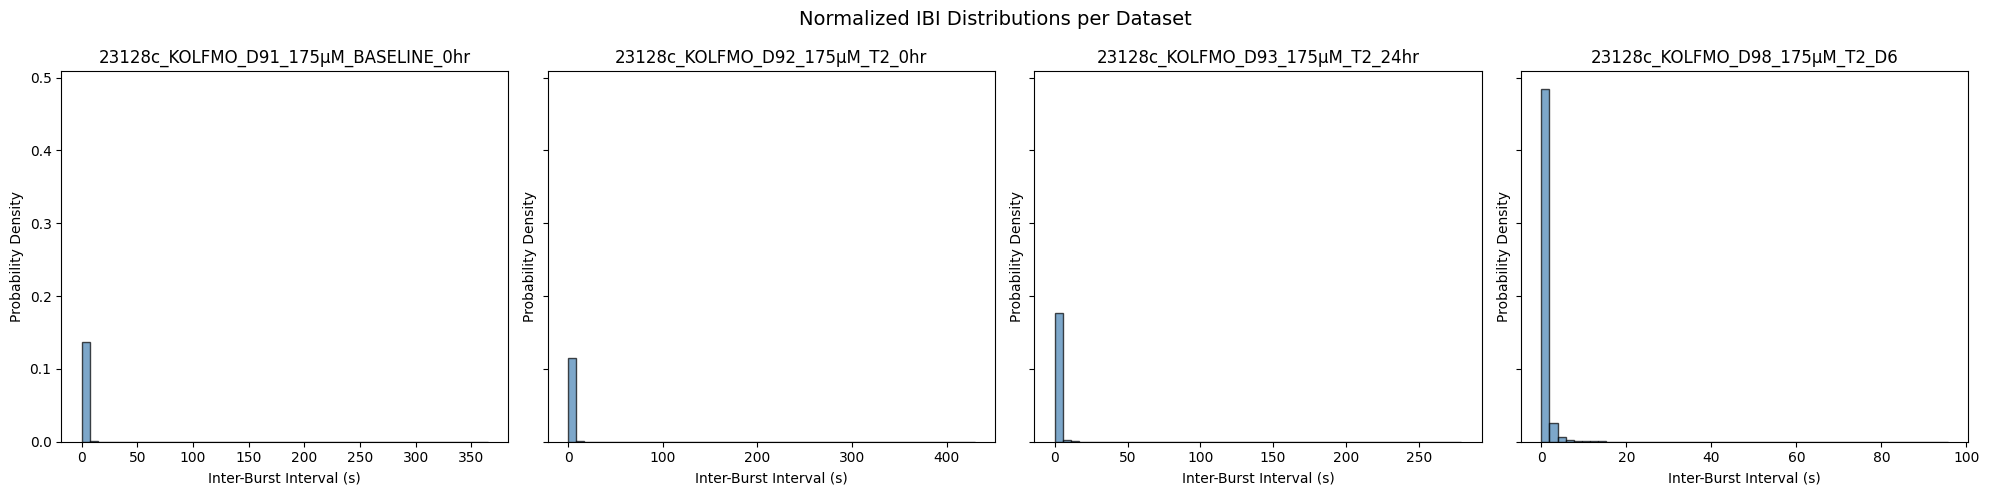

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# Config
# ---------------------------
config = {
    "bin_size_ms": 5.0,
    "threshold_rms": 1.7,
    "burst_edge_fraction": 0.5,
    "gauss_win_ms": 17.0,
    "square_win_ms": 5.0,
    "min_dist": 1950.0
}

datasets_to_plot = [
    "23128c_KOLFMO_D91_175µM_BASELINE_0hr",
    "23128c_KOLFMO_D92_175µM_T2_0hr",
    "23128c_KOLFMO_D93_175µM_T2_24hr",
    "23128c_KOLFMO_D98_175µM_T2_D6"
]

# ---------------------------
# Functions
# ---------------------------
def compute_ibi(spike_trains):
    """
    Compute inter-burst intervals (IBIs) from multiple neurons within a dataset.
    Parameters
    ----------
    spike_trains : list of arrays
        Each element is an array of spike times (in seconds) for a single neuron.
    Returns
    -------
    all_ibis : np.ndarray
        Flattened array of all IBIs (s) computed across neurons.
    """
    all_ibis = []
    for spikes in spike_trains:
        spikes = np.sort(np.array(spikes))
        if len(spikes) > 1:
            ibis = np.diff(spikes)
            ibis = ibis[ibis > 0]  # exclude zero or negative intervals
            all_ibis.extend(ibis)
    return np.array(all_ibis)

def plot_adjacent_ibi_distributions(dataset_names, orc, bins=50):
    """
    Computes and plots adjacent IBI distributions (one subplot per dataset).
    """
    num_datasets = len(dataset_names)
    fig, axes = plt.subplots(1, num_datasets, figsize=(5 * num_datasets, 5), sharey=True)

    # Ensure axes is iterable even for a single dataset
    if num_datasets == 1:
        axes = [axes]

    for ax, name in zip(axes, dataset_names):
        spike_trains = orc.spike_data[name].train
        ibis = compute_ibi(spike_trains)

        if len(ibis) == 0:
            ax.set_title(f"{name}\n(No IBIs)")
            ax.set_xlabel("Inter-Burst Interval (s)")
            ax.set_ylabel("Probability Density")
            continue

        ax.hist(ibis, bins=bins, density=True, alpha=0.7, color='steelblue', edgecolor='black')
        ax.set_title(name)
        ax.set_xlabel("Inter-Burst Interval (s)")
        ax.set_ylabel("Probability Density")

    plt.suptitle("Normalized IBI Distributions per Dataset", fontsize=14)
    plt.tight_layout()
    plt.show()


# ---------------------------
# Call plotting function
# ---------------------------
plot_adjacent_ibi_distributions(datasets_to_plot, orc, bins=50)


/var/folders/5b/0knmz8lj0x91l7symv3p4q2m0000gn/T/ipykernel_8638/265589484.py:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(ibi_data, labels=labels, showfliers=False)


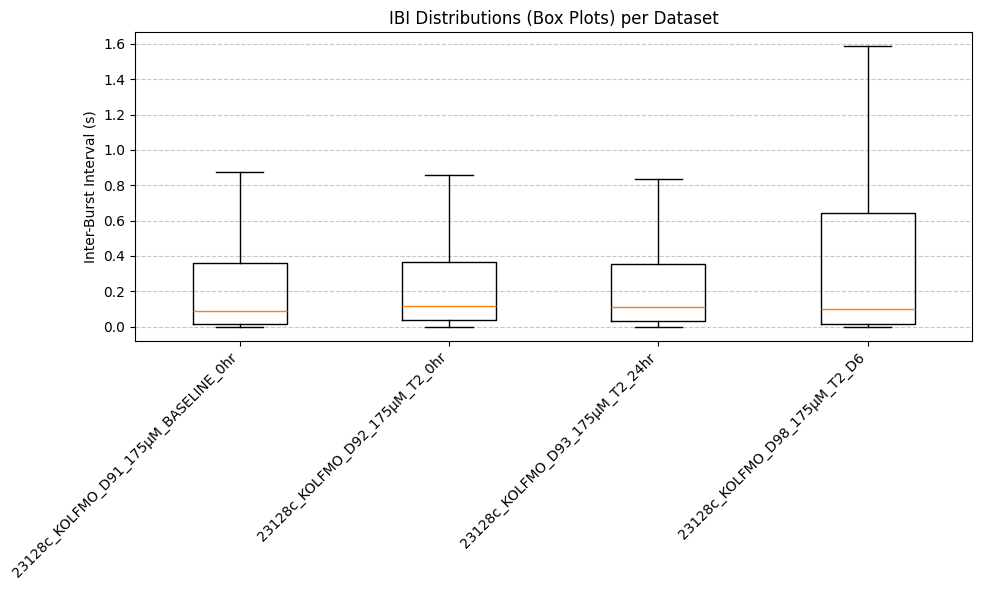

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# Config
# ---------------------------
config = {
    "bin_size_ms": 5.0,
    "threshold_rms": 1.7,
    "burst_edge_fraction": 0.5,
    "gauss_win_ms": 17.0,
    "square_win_ms": 5.0,
    "min_dist": 1950.0
}

datasets_to_plot = [
    "23128c_KOLFMO_D91_175µM_BASELINE_0hr",
    "23128c_KOLFMO_D92_175µM_T2_0hr",
    "23128c_KOLFMO_D93_175µM_T2_24hr",
    "23128c_KOLFMO_D98_175µM_T2_D6"
]

# ---------------------------
# Box plot function
# ---------------------------
def plot_ibi_boxplots(dataset_names, orc):
    """
    Computes and plots IBI box plots for multiple datasets.
    Each dataset's IBIs are shown as a separate box.
    """
    ibi_data = []
    labels = []

    for name in dataset_names:
        spike_trains = orc.spike_data[name].train
        ibis = compute_ibi(spike_trains)

        if len(ibis) == 0:
            print(f"Warning: No IBIs found for dataset {name}")
            ibis = [np.nan]  # Placeholder for empty dataset

        ibi_data.append(ibis)
        labels.append(name)

    plt.figure(figsize=(10, 6))
    plt.boxplot(ibi_data, labels=labels, showfliers=False)
    plt.title("IBI Distributions (Box Plots) per Dataset")
    plt.ylabel("Inter-Burst Interval (s)")
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# ---------------------------
# Call function
# ---------------------------
plot_ibi_boxplots(datasets_to_plot, orc)


/var/folders/5b/0knmz8lj0x91l7symv3p4q2m0000gn/T/ipykernel_8638/3537207982.py:53: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


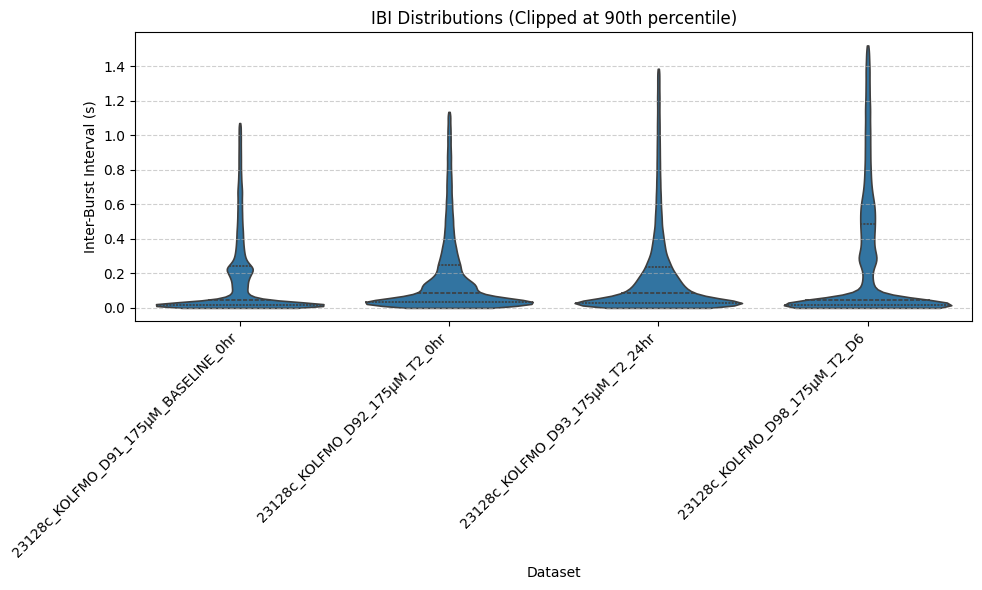

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ---------------------------
# Config
# ---------------------------
config = {
    "bin_size_ms": 5.0,
    "threshold_rms": 1.7,
    "burst_edge_fraction": 0.5,
    "gauss_win_ms": 17.0,
    "square_win_ms": 5.0,
    "min_dist": 1950.0
}

datasets_to_plot = [
    "23128c_KOLFMO_D91_175µM_BASELINE_0hr",
    "23128c_KOLFMO_D92_175µM_T2_0hr",
    "23128c_KOLFMO_D93_175µM_T2_24hr",
    "23128c_KOLFMO_D98_175µM_T2_D6"
]

# ---------------------------
# Violin plot with clipping
# ---------------------------
def plot_ibi_violinplots_clipped(dataset_names, orc, clip_percentile=80):
    """
    Computes and plots IBI violin plots for multiple datasets using seaborn.
    Clips outlier IBIs above the specified percentile to avoid axis compression.
    """
    data = []

    for name in dataset_names:
        spike_trains = orc.spike_data[name].train
        ibis = compute_ibi(spike_trains)

        if len(ibis) > 0:
            threshold = np.percentile(ibis, clip_percentile)
            ibis_clipped = ibis[ibis <= threshold]
            data.extend([(name, val) for val in ibis_clipped])
        else:
            print(f"Warning: No IBIs found for dataset {name}")

    if not data:
        print("No IBI data available for plotting.")
        return

    df = pd.DataFrame(data, columns=["Dataset", "IBI (s)"])

    plt.figure(figsize=(10, 6))
    sns.violinplot(
        x="Dataset", 
        y="IBI (s)", 
        data=df, 
        scale="width", 
        cut=0, 
        inner="quartile",
        linewidth=1.2
    )
    plt.title(f"IBI Distributions (Clipped at {clip_percentile}th percentile)")
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Inter-Burst Interval (s)")
    plt.grid(True, axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# ---------------------------
# Call function
# ---------------------------
plot_ibi_violinplots_clipped(datasets_to_plot, orc, clip_percentile=90)


/var/folders/5b/0knmz8lj0x91l7symv3p4q2m0000gn/T/ipykernel_8638/1645910158.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/var/folders/5b/0knmz8lj0x91l7symv3p4q2m0000gn/T/ipykernel_8638/1645910158.py:82: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


Saved plot: IBI_Treated_Group_1.png


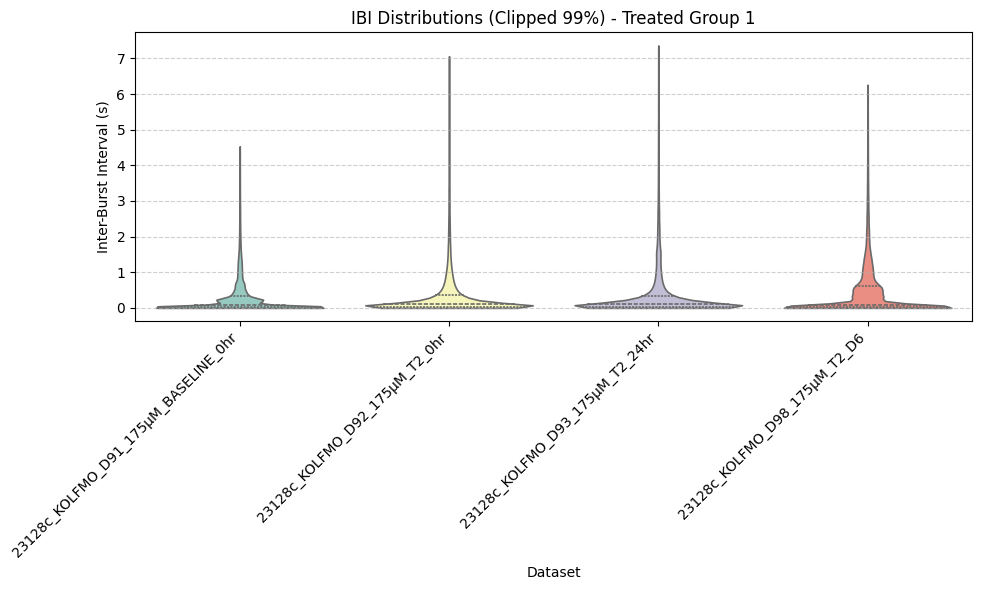

/var/folders/5b/0knmz8lj0x91l7symv3p4q2m0000gn/T/ipykernel_8638/1645910158.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/var/folders/5b/0knmz8lj0x91l7symv3p4q2m0000gn/T/ipykernel_8638/1645910158.py:82: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


Saved plot: IBI_Treated_Group_2.png


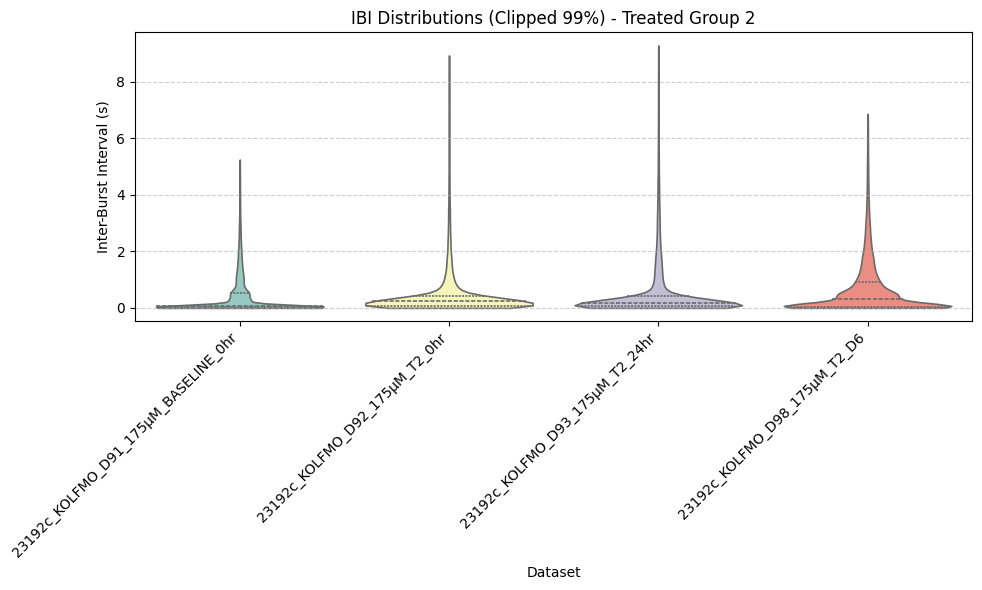

/var/folders/5b/0knmz8lj0x91l7symv3p4q2m0000gn/T/ipykernel_8638/1645910158.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/var/folders/5b/0knmz8lj0x91l7symv3p4q2m0000gn/T/ipykernel_8638/1645910158.py:82: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


Saved plot: IBI_Treated_Group_3.png


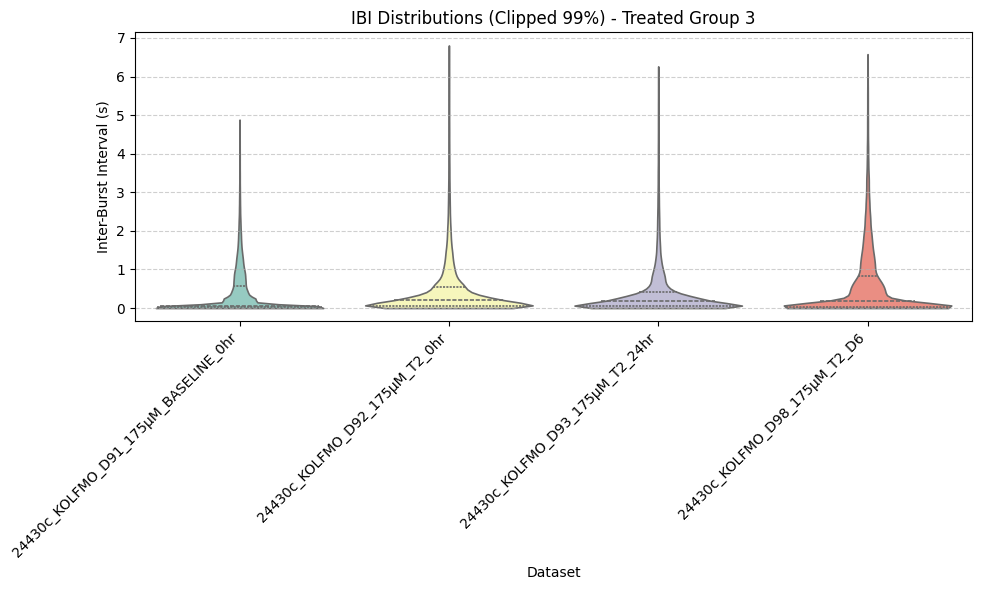

/var/folders/5b/0knmz8lj0x91l7symv3p4q2m0000gn/T/ipykernel_8638/1645910158.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/var/folders/5b/0knmz8lj0x91l7symv3p4q2m0000gn/T/ipykernel_8638/1645910158.py:82: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


Saved plot: IBI_Treated_Group_4.png


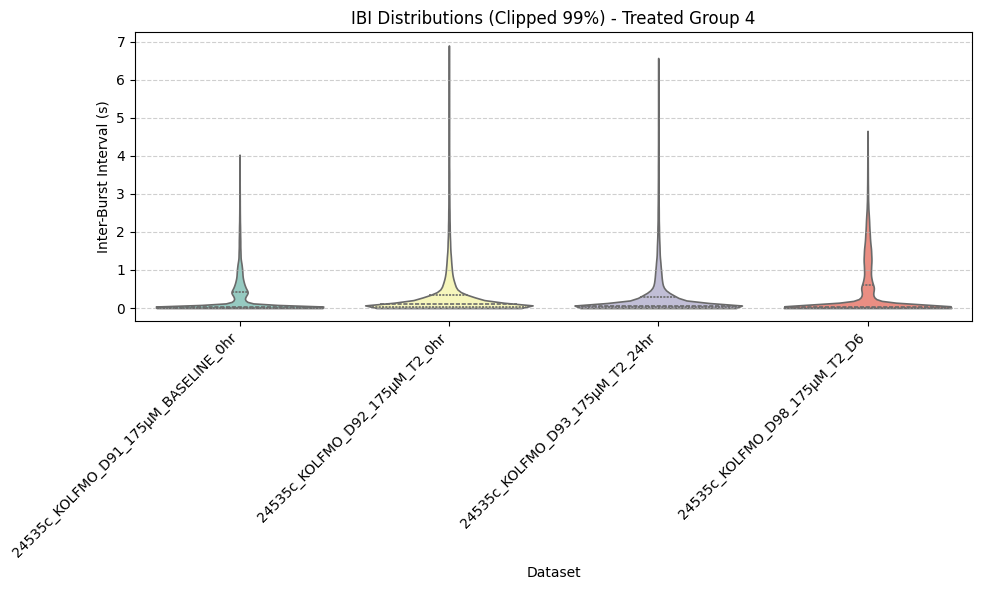

/var/folders/5b/0knmz8lj0x91l7symv3p4q2m0000gn/T/ipykernel_8638/1645910158.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/var/folders/5b/0knmz8lj0x91l7symv3p4q2m0000gn/T/ipykernel_8638/1645910158.py:82: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


Saved plot: IBI_Treated_Group_5.png


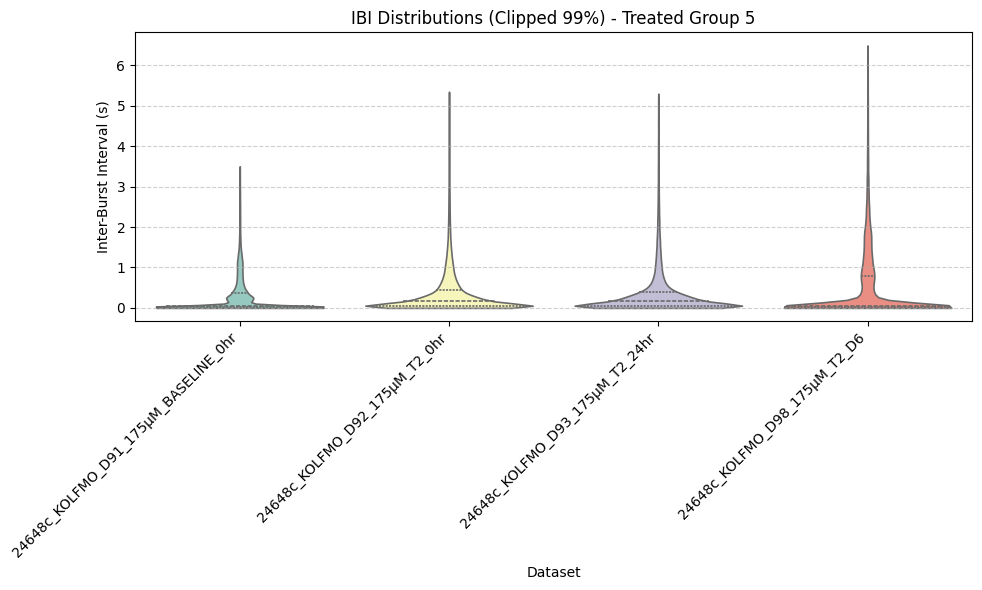

/var/folders/5b/0knmz8lj0x91l7symv3p4q2m0000gn/T/ipykernel_8638/1645910158.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/var/folders/5b/0knmz8lj0x91l7symv3p4q2m0000gn/T/ipykernel_8638/1645910158.py:82: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


Saved plot: IBI_Treated_Group_6.png


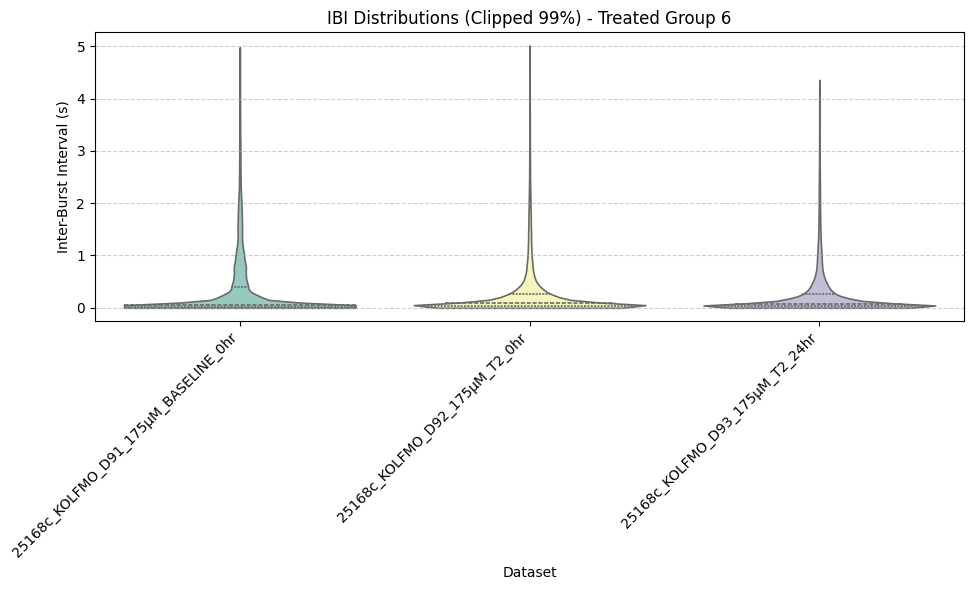

/var/folders/5b/0knmz8lj0x91l7symv3p4q2m0000gn/T/ipykernel_8638/1645910158.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/var/folders/5b/0knmz8lj0x91l7symv3p4q2m0000gn/T/ipykernel_8638/1645910158.py:82: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


Saved plot: IBI_Control_Group_1.png


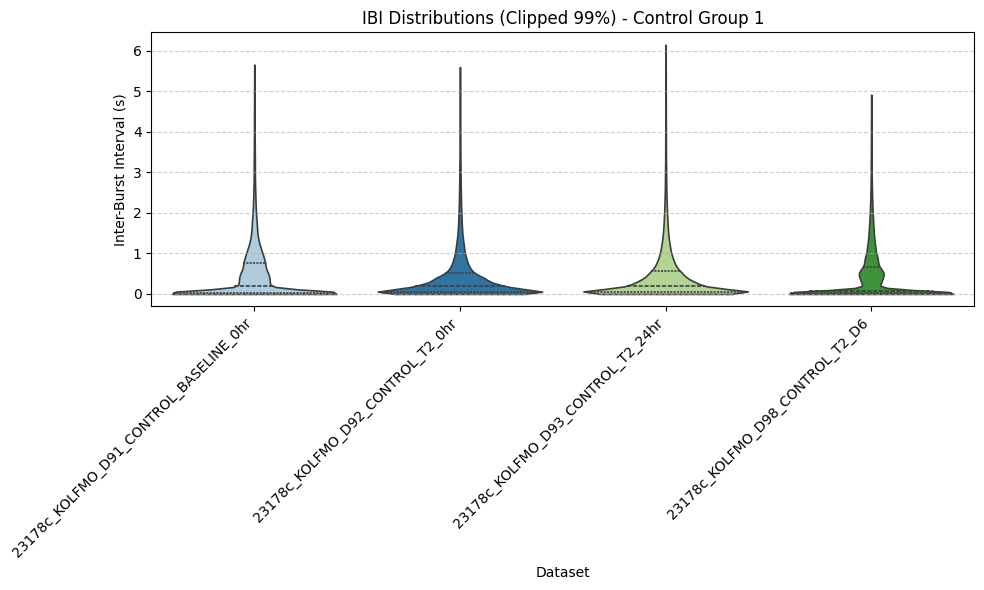

/var/folders/5b/0knmz8lj0x91l7symv3p4q2m0000gn/T/ipykernel_8638/1645910158.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/var/folders/5b/0knmz8lj0x91l7symv3p4q2m0000gn/T/ipykernel_8638/1645910158.py:82: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


Saved plot: IBI_Control_Group_2.png


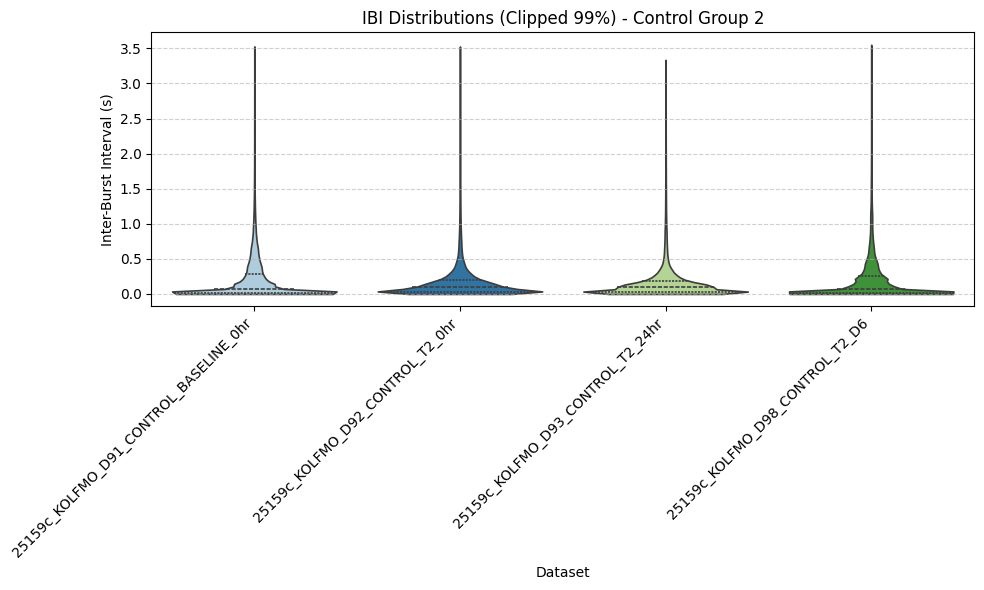

KeyError: '25168c_KOLFMO_D98_CONTROL_T2_D6'

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# ---------------------------
# Dataset groups (same as before)
# ---------------------------
dataset_groups = {
    "Treated": [
        "23128c_KOLFMO_D91_175µM_BASELINE_0hr",
        "23128c_KOLFMO_D92_175µM_T2_0hr",
        "23128c_KOLFMO_D93_175µM_T2_24hr",
        "23128c_KOLFMO_D98_175µM_T2_D6",
        
        "23192c_KOLFMO_D91_175µM_BASELINE_0hr",
        "23192c_KOLFMO_D92_175µM_T2_0hr",
        "23192c_KOLFMO_D93_175µM_T2_24hr",
        "23192c_KOLFMO_D98_175µM_T2_D6",
        
        "24430c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24430c_KOLFMO_D92_175µM_T2_0hr",
        "24430c_KOLFMO_D93_175µM_T2_24hr",
        "24430c_KOLFMO_D98_175µM_T2_D6",
        
        "24535c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24535c_KOLFMO_D92_175µM_T2_0hr",
        "24535c_KOLFMO_D93_175µM_T2_24hr",
        "24535c_KOLFMO_D98_175µM_T2_D6",
        
        "24648c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24648c_KOLFMO_D92_175µM_T2_0hr",
        "24648c_KOLFMO_D93_175µM_T2_24hr",
        "24648c_KOLFMO_D98_175µM_T2_D6",
        
        "25168c_KOLFMO_D91_175µM_BASELINE_0hr",
        "25168c_KOLFMO_D92_175µM_T2_0hr",
        "25168c_KOLFMO_D93_175µM_T2_24hr"
    ],
    "Control": [
        "23178c_KOLFMO_D91_CONTROL_BASELINE_0hr",
        "23178c_KOLFMO_D92_CONTROL_T2_0hr",
        "23178c_KOLFMO_D93_CONTROL_T2_24hr",
        "23178c_KOLFMO_D98_CONTROL_T2_D6",
        
        "25159c_KOLFMO_D91_CONTROL_BASELINE_0hr",
        "25159c_KOLFMO_D92_CONTROL_T2_0hr",
        "25159c_KOLFMO_D93_CONTROL_T2_24hr",
        "25159c_KOLFMO_D98_CONTROL_T2_D6",
        
        "25168c_KOLFMO_D91_175µM_BASELINE_0hr",  
        "25168c_KOLFMO_D92_175µM_T2_0hr",        
        "25168c_KOLFMO_D93_175µM_T2_24hr",
        "25168c_KOLFMO_D98_CONTROL_T2_D6"        
    ]
}

# ---------------------------
# Function: clipped violin plots with optional saving and custom colors
# ---------------------------
def plot_ibi_violinplots_grouped(dataset_names, orc, group_title="", clip_percentile=99, 
                                 save=False, save_dir="plots", palette="Set2"):
    data = []
    for name in dataset_names:
        spike_trains = orc.spike_data[name].train
        ibis = compute_ibi(spike_trains)
        if len(ibis) > 0:
            threshold = np.percentile(ibis, clip_percentile)
            ibis_clipped = ibis[ibis <= threshold]
            data.extend([(name, val) for val in ibis_clipped])
        else:
            print(f"Warning: No IBIs found for dataset {name}")

    if not data:
        print("No IBI data available for plotting.")
        return

    df = pd.DataFrame(data, columns=["Dataset", "IBI (s)"])

    plt.figure(figsize=(10, 6))
    sns.violinplot(
        x="Dataset",
        y="IBI (s)",
        data=df,
        scale="width",
        cut=0,
        inner="quartile",
        linewidth=1.2,
        palette=palette
    )
    plt.title(f"IBI Distributions (Clipped {clip_percentile}%) - {group_title}")
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Inter-Burst Interval (s)")
    plt.grid(True, axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()

    # Save figure if requested
    if save:
        os.makedirs(save_dir, exist_ok=True)
        filename = f"IBI_{group_title.replace(' ', '_')}.png"
        plt.savefig(os.path.join(save_dir, filename), dpi=300)
        print(f"Saved plot: {filename}")

    plt.show()

# ---------------------------
# Helper: split list into chunks of N
# ---------------------------
def chunk_list(lst, n):
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

# ---------------------------
# Generate all figures
# ---------------------------
for i, group in enumerate(chunk_list(dataset_groups["Treated"], 4), start=1):
    plot_ibi_violinplots_grouped(group, orc, group_title=f"Treated Group {i}", save=True, palette="Set3")

for i, group in enumerate(chunk_list(dataset_groups["Control"], 4), start=1):
    plot_ibi_violinplots_grouped(group, orc, group_title=f"Control Group {i}", save=True, palette="Paired")


/var/folders/5b/0knmz8lj0x91l7symv3p4q2m0000gn/T/ipykernel_8638/703518035.py:42: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


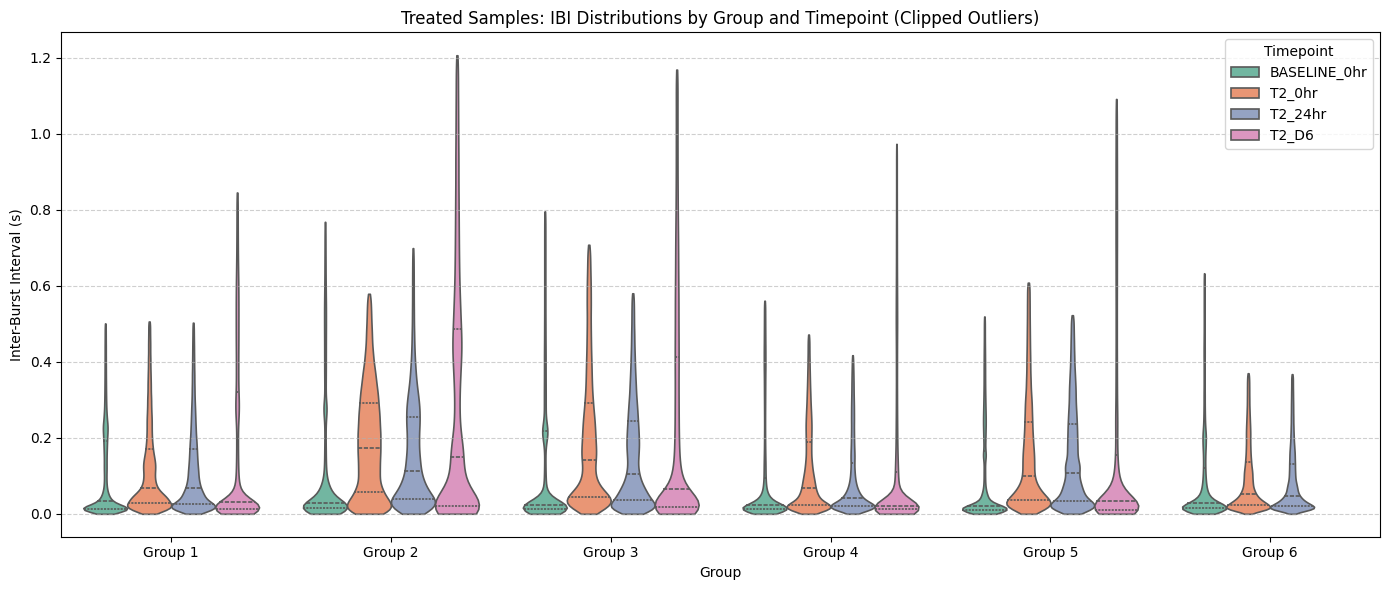

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_all_treated_adjacent(dataset_groups, orc, clip_percentile=99):
    """
    Plots all treated samples in one violin plot figure with blocks of time points per group.
    """
    data = []
    group_labels = []
    time_labels = ["BASELINE_0hr", "T2_0hr", "T2_24hr", "T2_D6"]

    treated_datasets = dataset_groups["Treated"]

    # Split treated datasets into groups of 4 (last group may have 3)
    grouped_datasets = [treated_datasets[i:i+4] for i in range(0, len(treated_datasets), 4)]

    # Collect data with "Group" and "Timepoint" labels
    for group_idx, group in enumerate(grouped_datasets, start=1):
        for ds_name in group:
            spike_trains = orc.spike_data[ds_name].train
            ibis = compute_ibi(spike_trains)
            if len(ibis) > 0:
                threshold = np.percentile(ibis, clip_percentile)
                ibis_clipped = ibis[ibis <= threshold]
                # Extract timepoint label from dataset name
                timepoint = next((t for t in time_labels if t in ds_name), ds_name)
                for val in ibis_clipped:
                    data.append((f"Group {group_idx}", timepoint, val))

    if not data:
        print("No IBI data available for plotting.")
        return

    df = pd.DataFrame(data, columns=["Group", "Timepoint", "IBI (s)"])

    # Order the categories properly
    df["Timepoint"] = pd.Categorical(df["Timepoint"], categories=time_labels, ordered=True)

    plt.figure(figsize=(14, 6))
    sns.violinplot(
        x="Group", 
        y="IBI (s)", 
        hue="Timepoint",
        data=df, 
        scale="width", 
        cut=0, 
        inner="quartile",
        linewidth=1.2,
        palette="Set2"
    )

    plt.title("Treated Samples: IBI Distributions by Group and Timepoint (Clipped Outliers)")
    plt.ylabel("Inter-Burst Interval (s)")
    plt.grid(True, axis='y', linestyle='--', alpha=0.6)
    plt.legend(title="Timepoint")
    plt.tight_layout()
    plt.show()

# ---------------------------
# Call function
# ---------------------------
plot_all_treated_adjacent(dataset_groups, orc, clip_percentile=80)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def extract_burst_metrics(orc, dataset_groups, config=None):
    """
    dataset_groups = {
        "Control": ["MO6359s2_D60_Control_BASELINE_0hr", ...],
        "Treated": ["MO6359s6_D53_175µM_BASELINE_0hr", ...]
    }
    """
    metrics = {group: {} for group in dataset_groups}

    for group, datasets in dataset_groups.items():
        for dataset_key in datasets:
            detector = orc.get_burst_detector(dataset_key, config)
            times, smoothed, peaks, peak_times, bursts, burst_windows = detector.compute_population_rate_and_bursts()

            if len(bursts) == 0 or len(peaks) == 0:
                continue

            # Burst widths (end - start)
            widths = [(end - start) * (times[1] - times[0]) for start, end in burst_windows]

            # IBIs (diff between consecutive peaks)
            ibis = np.diff([times[p] for p in peaks]) if len(peaks) > 1 else []

            metrics[group][dataset_key] = {
                "widths": widths,
                "ibis": ibis
            }

    return metrics


def plot_burst_metrics(metrics, timepoint_order=None):
    """
    metrics = output of extract_burst_metrics
    timepoint_order = ["BASELINE_0hr", "T2_24hr", "T2_72hr", "T2_D6"]
    """
    if timepoint_order is None:
        timepoint_order = ["BASELINE_0hr", "T2_24hr", "T2_72hr", "T2_D6"]

    for metric_type in ["widths", "ibis"]:
        plt.figure(figsize=(8,5))
        for group, datasets in metrics.items():
            means, stds = [], []
            for tp in timepoint_order:
                matched = [v[metric_type] for k,v in datasets.items() if tp in k]
                values = np.concatenate(matched) if matched else []
                means.append(np.mean(values) if len(values) else np.nan)
                stds.append(np.std(values) if len(values) else np.nan)

            plt.errorbar(timepoint_order, means, yerr=stds, marker='o', label=group)

        plt.title(f"Mean {metric_type.capitalize()} Over Time")
        plt.xlabel("Timepoint")
        plt.ylabel("ms")
        plt.legend()
        plt.grid(True)
        plt.show()


In [ ]:
print("Available datasets:", orc.list_datasets())


In [ ]:
config = {
    "bin_size_ms": 5.0,
    "threshold_rms": 1.7,
    "burst_edge_fraction": 0.25,
    "gauss_win_ms": 17.0,
    "square_win_ms": 9.0,
    "min_dist": 3000.0
}


dataset_groups = {
    "Control": [
        "MO6359s2_D53_Control_BASELINE_0hr",
        "MO6359s2_D55_Control_T2_24hr",
        "MO6359s2_D56_Control_T2_48hr",
        "MO6359s2_D57_Control_T2_72hr",
        "MO6359s2_D58_Control_T2_D4",
        "MO6359s2_D59_Control_T2_D5",
        "MO6359s2_D60_Control_T2_D6"
    ],
    "Treated": [
        "MO6359s6_D53_175µM_BASELINE_0hr",
        "MO6359s6_D55_175µM_T2_24hr",
        "MO6359s6_D56_175µM_T2_48hr",
        "MO6359s6_D57_175µM_T2_72hr",
        "MO6359s6_D58_175µM_T2_D4",
        "MO6359s6_D59_175µM_T2_D5",
        "MO6359s6_D60_175µM_T2_D6"
    ]
}

# Extract burst metrics
metrics = extract_burst_metrics(orc, dataset_groups)

# Plot mean ± variability for burst widths and IBIs
plot_burst_metrics(metrics, timepoint_order=["BASELINE_0hr", "T2_24hr", "T2_72hr", "T2_D6"])

In [ ]:
print(orc.list_datasets())

In [ ]:
def extract_all_burst_widths(orc, dataset_groups, config=None):
    results = {group: {} for group in dataset_groups}

    for group, datasets in dataset_groups.items():
        for dataset_key in datasets:
            detector = orc.get_burst_detector(dataset_key, config)
            _, _, _, _, bursts, _ = detector.compute_population_rate_and_bursts()

            if len(bursts) == 0:
                continue

            # Calculate widths (s)
            bin_size_s = detector.config.get("bin_size_s", 0.01)
            widths = [(end - start) * bin_size_s for start, end in bursts]

            # Timepoint label
            timepoint = "_".join(dataset_key.split("_")[3:])

            if timepoint not in results[group]:
                results[group][timepoint] = []
            results[group][timepoint].extend(widths)

    return results


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_burst_width_violins(data):
    # Flatten the data
    rows = []
    for group, group_data in data.items():
        for tp, values in group_data.items():
            for v in values:
                rows.append((tp, v, group))
    df = pd.DataFrame(rows, columns=["Timepoint", "Burst Width", "Group"])

    plt.figure(figsize=(10, 6))
    sns.violinplot(
        data=df,
        x="Timepoint",
        y="Burst Width",
        hue="Group",
        inner="box",
        dodge=True,
        cut=0,
        scale="width",
        width=0.4,
        split=False  # ensures both violins face the same way
    )

    plt.title("Burst Width Distributions Over Time")
    plt.ylabel("Burst Width (s)")
    plt.xlabel("Timepoint")
    plt.legend(title="Group")
    plt.tight_layout()
    plt.show()


In [ ]:
#MaxTwo Kolf

config = {
    "bin_size_ms": 5.0,
    "threshold_rms": 1.7,
    "burst_edge_fraction": 0.25,
    "gauss_win_ms": 17.0,
    "square_win_ms": 9.0,
    "min_dist": 3000.0
}


dataset_groups = {
    "Control": [
        "MO6359s2_D53_Control_BASELINE_0hr",
        "MO6359s2_D55_Control_T2_24hr",
        "MO6359s2_D56_Control_T2_48hr",
        "MO6359s2_D57_Control_T2_72hr",
        "MO6359s2_D58_Control_T2_D4",
        "MO6359s2_D59_Control_T2_D5",
        "MO6359s2_D60_Control_T2_D6"
    ],
    "Treated": [
        "MO6359s6_D53_175µM_BASELINE_0hr",
        "MO6359s6_D55_175µM_T2_24hr",
        "MO6359s6_D56_175µM_T2_48hr",
        "MO6359s6_D57_175µM_T2_72hr",
        "MO6359s6_D58_175µM_T2_D4",
        "MO6359s6_D59_175µM_T2_D5",
        "MO6359s6_D60_175µM_T2_D6"
    ]
}

burst_widths = extract_all_burst_widths(orc, dataset_groups, config)
plot_burst_width_violins(burst_widths)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

def prepare_burst_widths_df_fixed(burst_widths):
    rows = []
    for group, datasets in burst_widths.items():
        for dataset_name, widths in datasets.items():
            timepoint = "_".join(dataset_name.split("_")[-2:])
            
            # Extract dataset number (e.g., 23128 from 23128c_KOLFMO...)
            match = re.match(r"(\d{5})", dataset_name)
            dataset_id = match.group(1) if match else dataset_name
            
            for w in widths:
                rows.append({
                    "DatasetID": dataset_id,
                    "Sample": dataset_name,
                    "Timepoint": timepoint,
                    "Burst Width (s)": w
                })
    return pd.DataFrame(rows)


def plot_burst_widths(burst_widths_df, output_dir=None):

    treated_df = burst_widths_df.copy()

    # Create combined labels
    treated_df["Label"] = treated_df["Sample"] + " | " + treated_df["Timepoint"]

    # Get unique labels
    unique_labels = treated_df["Label"].unique()

    # Assign numeric x positions
    label_to_pos = {label: i * 1 for i, label in enumerate(unique_labels)}
    treated_df["Xpos"] = treated_df["Label"].map(label_to_pos)

    # Plot
    plt.figure(figsize=(max(25, len(unique_labels) * 0.6), 8)) # adust spacing
    sns.violinplot(
        x="Xpos",
        y="Burst Width (s)",
        data=treated_df,
        cut=0,
        inner="box",
        bw=0.3
    )

    # Set ticks correctly
    plt.xticks(
        [label_to_pos[l] for l in unique_labels],
        unique_labels,
        rotation=90,
        fontsize=9
    )

    plt.title("Burst Widths -MaxOne Kolf 2.2J Treated", fontsize=18)
    plt.xlabel("Sample | Timepoint", fontsize=14)
    plt.ylabel("Burst Width (s)", fontsize=14)

    plt.tight_layout()
    if output_dir:
        plt.savefig(f"{output_dir}/burst_widths_spaced.png", dpi=300)
    plt.show()

In [ ]:
# MaxOne Kolf

config = {
    "bin_size_ms": 5.0,
    "threshold_rms": 1.7,
    "burst_edge_fraction": 0.5,
    "gauss_win_ms": 17.0,
    "square_win_ms": 5.0,
    "min_dist": 1950.0
}

dataset_groups = {
    "Treated": [
        "23128c_KOLFMO_D91_175µM_BASELINE_0hr",
        "23128c_KOLFMO_D92_175µM_T2_0hr",
        "23128c_KOLFMO_D93_175µM_T2_24hr",
        "23128c_KOLFMO_D98_175µM_T2_D6",
        
        "23192c_KOLFMO_D91_175µM_BASELINE_0hr",
        "23192c_KOLFMO_D92_175µM_T2_0hr",
        "23192c_KOLFMO_D93_175µM_T2_24hr",
        "23192c_KOLFMO_D98_175µM_T2_D6",
        
        "24430c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24430c_KOLFMO_D92_175µM_T2_0hr",
        "24430c_KOLFMO_D93_175µM_T2_24hr",
        "24430c_KOLFMO_D98_175µM_T2_D6",
        
        "24535c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24535c_KOLFMO_D92_175µM_T2_0hr",
        "24535c_KOLFMO_D93_175µM_T2_24hr",
        "24535c_KOLFMO_D98_175µM_T2_D6",
        
        "24648c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24648c_KOLFMO_D92_175µM_T2_0hr",
        "24648c_KOLFMO_D93_175µM_T2_24hr",
        "24648c_KOLFMO_D98_175µM_T2_D6",
        
        "25168c_KOLFMO_D91_175µM_BASELINE_0hr",
        "25168c_KOLFMO_D92_175µM_T2_0hr",
        "25168c_KOLFMO_D93_175µM_T2_24hr"
    ],
    "Control": [
        "23178c_KOLFMO_D91_CONTROL_BASELINE_0hr",
        "23178c_KOLFMO_D92_CONTROL_T2_0hr",
        "23178c_KOLFMO_D93_CONTROL_T2_24hr",
        "23178c_KOLFMO_D98_CONTROL_T2_D6",
        
        "25159c_KOLFMO_D91_CONTROL_BASELINE_0hr",
        "25159c_KOLFMO_D92_CONTROL_T2_0hr",
        "25159c_KOLFMO_D93_CONTROL_T2_24hr",
        "25159c_KOLFMO_D98_CONTROL_T2_D6",
        
        "25168c_KOLFMO_D91_175µM_BASELINE_0hr",  
        "25168c_KOLFMO_D92_175µM_T2_0hr",        
        "25168c_KOLFMO_D93_175µM_T2_24hr",
        "25168c_KOLFMO_D98_CONTROL_T2_D6"        
    ]
}

burst_widths = extract_all_burst_widths(orc, dataset_groups, config)
burst_widths_df = prepare_burst_widths_df(burst_widths)
plot_burst_widths(burst_widths_df)



In [ ]:
def extract_all_burst_widths(orc, dataset_groups, config):
    burst_widths = {}
    skipped_datasets = []

    for group, datasets in dataset_groups.items():
        burst_widths[group] = {}
        for dataset_key in datasets:
            try:
                detector = orc.get_burst_detector(dataset_key, config)
                _, _, _, _, bursts, _ = detector.compute_population_rate_and_bursts()

                if len(bursts) == 0:
                    burst_widths[group][dataset_key] = [np.nan]
                else:
                    widths = [b["width"] for b in bursts if "width" in b]
                    burst_widths[group][dataset_key] = widths if widths else [np.nan]
            except Exception as e:
                skipped_datasets.append((dataset_key, str(e)))
                burst_widths[group][dataset_key] = [np.nan]

    if skipped_datasets:
        print("Skipped datasets (errors or not found):")
        for ds, err in skipped_datasets:
            print(f"  - {ds}: {err}")

    return burst_widths

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_burst_width_violins(burst_widths_df, timepoint_order=None):
    """
    Plot burst width distributions as violin plots with placeholders for missing data.
    burst_widths_df = DataFrame with columns ["Group", "Timepoint", "Burst Width (s)"]
    """
    if timepoint_order is None:
        timepoint_order = ["BASELINE_0hr", "T2_0hr", "T2_24hr", "T2_D6"]

    # Ensure all combinations of group/timepoint exist
    groups = burst_widths_df["Group"].unique()
    for tp in timepoint_order:
        for group in groups:
            exists = ((burst_widths_df["Timepoint"] == tp) &
                      (burst_widths_df["Group"] == group)).any()
            if not exists:
                burst_widths_df = pd.concat([
                    burst_widths_df,
                    pd.DataFrame({"Group": [group],
                                  "Timepoint": [tp],
                                  "Burst Width (s)": [np.nan]})
                ], ignore_index=True)

    plt.figure(figsize=(12, 6))
    sns.violinplot(
        x="Timepoint",
        y="Burst Width (s)",
        hue="Group",
        data=burst_widths_df,
        density_norm='width',
        cut=0
    )

    plt.title("Burst Width Distributions Over Time", fontsize=14)
    plt.xlabel("Timepoint", fontsize=12)
    plt.ylabel("Burst Width (s)", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Group")
    plt.grid(True, axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def extract_all_burst_widths(orc, dataset_groups, config):
    burst_widths = {}
    skipped_datasets = []

    for group, datasets in dataset_groups.items():
        burst_widths[group] = {}
        for dataset_key in datasets:
            try:
                detector = orc.get_burst_detector(dataset_key, config)
                _, _, _, _, bursts, _ = detector.compute_population_rate_and_bursts()

                if len(bursts) == 0:
                    burst_widths[group][dataset_key] = [np.nan]
                else:
                    widths = [b["width"] for b in bursts if "width" in b]
                    burst_widths[group][dataset_key] = widths if widths else [np.nan]
            except Exception as e:
                skipped_datasets.append((dataset_key, str(e)))
                burst_widths[group][dataset_key] = [np.nan]

    if skipped_datasets:
        print("Skipped datasets (errors or not found):")
        for ds, err in skipped_datasets:
            print(f"  - {ds}: {err}")

    return burst_widths

def plot_burst_width_violins(burst_widths_df, timepoint_order=None):
    """
    Plot burst width distributions as violin plots, 
    forcing placeholders for missing data so every panel shows.
    """
    # Clean up labels
    burst_widths_df["Timepoint"] = burst_widths_df["Timepoint"].str.replace(r"^\d+µM_", "", regex=True)

    if timepoint_order is None:
        timepoint_order = sorted(burst_widths_df["Timepoint"].unique())
        
    # Fill missing group-timepoint combos with zero-width placeholder
    groups = burst_widths_df["Group"].unique()
    for tp in timepoint_order:
        for group in groups:
            if not ((burst_widths_df["Timepoint"] == tp) &
                    (burst_widths_df["Group"] == group)).any():
                burst_widths_df = pd.concat([
                    burst_widths_df,
                    pd.DataFrame({
                        "Group": [group],
                        "Timepoint": [tp],
                        "Burst Width (s)": [0.0]  # <-- force a visible placeholder
                    })
                ], ignore_index=True)

    plt.figure(figsize=(12, 6))
    sns.violinplot(
        x="Timepoint",
        y="Burst Width (s)",
        hue="Group",
        data=burst_widths_df,
        density_norm='width',
        cut=0,
        scale="width"
    )

    plt.title("Burst Width Distributions Over Time", fontsize=14)
    plt.xlabel("Timepoint", fontsize=12)
    plt.ylabel("Burst Width (s)", fontsize=12)
    plt.xticks(rotation=0)
    plt.legend(title="Group")
    plt.grid(True, axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


In [ ]:
# MaxOne Kolf

config = {
    "bin_size_ms": 5.0,
    "threshold_rms": 1.7,
    "burst_edge_fraction": 0.5,
    "gauss_win_ms": 17.0,
    "square_win_ms": 5.0,
    "min_dist": 1950.0
}

dataset_groups = {
    "Treated": [
        "23128c_KOLFMO_D91_175µM_BASELINE_0hr",
        "23128c_KOLFMO_D92_175µM_T2_0hr",
        "23128c_KOLFMO_D93_175µM_T2_24hr",
        "23128c_KOLFMO_D98_175µM_T2_D6",
        
        "23192c_KOLFMO_D91_175µM_BASELINE_0hr",
        "23192c_KOLFMO_D92_175µM_T2_0hr",
        "23192c_KOLFMO_D93_175µM_T2_24hr",
        "23192c_KOLFMO_D98_175µM_T2_D6",
        
        "24430c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24430c_KOLFMO_D92_175µM_T2_0hr",
        "24430c_KOLFMO_D93_175µM_T2_24hr",
        "24430c_KOLFMO_D98_175µM_T2_D6",
        
        "24535c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24535c_KOLFMO_D92_175µM_T2_0hr",
        "24535c_KOLFMO_D93_175µM_T2_24hr",
        "24535c_KOLFMO_D98_175µM_T2_D6",
        
        "24648c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24648c_KOLFMO_D92_175µM_T2_0hr",
        "24648c_KOLFMO_D93_175µM_T2_24hr",
        "24648c_KOLFMO_D98_175µM_T2_D6",
        
        "25168c_KOLFMO_D91_175µM_BASELINE_0hr",
        "25168c_KOLFMO_D92_175µM_T2_0hr",
        "25168c_KOLFMO_D93_175µM_T2_24hr"
    ],
    "Control": [
        "23178c_KOLFMO_D91_CONTROL_BASELINE_0hr",
        "23178c_KOLFMO_D92_CONTROL_T2_0hr",
        "23178c_KOLFMO_D93_CONTROL_T2_24hr",
        "23178c_KOLFMO_D98_CONTROL_T2_D6",
        
        "25159c_KOLFMO_D91_CONTROL_BASELINE_0hr",
        "25159c_KOLFMO_D92_CONTROL_T2_0hr",
        "25159c_KOLFMO_D93_CONTROL_T2_24hr",
        "25159c_KOLFMO_D98_CONTROL_T2_D6",
        
        "25168c_KOLFMO_D91_175µM_BASELINE_0hr",  
        "25168c_KOLFMO_D92_175µM_T2_0hr",        
        "25168c_KOLFMO_D93_175µM_T2_24hr",
        "25168c_KOLFMO_D98_CONTROL_T2_D6"        
    ]
}

timepoint_order = ["BASELINE_0hr", "T2_0hr", "T2_24hr", "T2_D6"]

def prepare_burst_widths_df(burst_widths):
    rows = []
    for group, datasets in burst_widths.items():
        for dataset_name, widths in datasets.items():
            for w in widths:
                rows.append({
                    "Group": group,
                    "Dataset": dataset_name,
                    "Timepoint": "_".join(dataset_name.split("_")[-2:]),  # Extract last two parts
                    "Burst Width (s)": w
                })
    return pd.DataFrame(rows)

# Convert first
burst_widths_df = prepare_burst_widths_df(burst_widths)

burst_widths = extract_all_burst_widths(orc, dataset_groups, config)
burst_widths_df = prepare_burst_widths_df(burst_widths)
plot_burst_width_violins(burst_widths_df, timepoint_order)





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def extract_all_burst_widths(orc, dataset_groups, config):
    burst_widths = {}
    skipped_datasets = []

    for group, datasets in dataset_groups.items():
        burst_widths[group] = {}
        for dataset_key in datasets:
            try:
                detector = orc.get_burst_detector(dataset_key, config)
                results = detector.compute_population_rate_and_bursts()

                bursts = results[4] if isinstance(results, (list, tuple)) and len(results) >= 5 else []

                widths = []
                for b in bursts:
                    if isinstance(b, dict) and "width" in b:
                        widths.append(b["width"] / 1000.0)  # ✅ convert ms → sec
                    elif isinstance(b, (list, tuple)) and len(b) >= 2:
                        widths.append(b[1] / 1000.0)  # ✅ convert ms → sec
                
                burst_widths[group][dataset_key] = widths if widths else [np.nan]

            except Exception as e:
                skipped_datasets.append((dataset_key, str(e)))
                burst_widths[group][dataset_key] = [np.nan]

    if skipped_datasets:
        print("Skipped datasets (errors or not found):")
        for ds, err in skipped_datasets:
            print(f"  - {ds}: {err}")

    print("\nBurst counts per dataset:")
    for group, datasets in burst_widths.items():
        for ds, widths in datasets.items():
            valid = [w for w in widths if not np.isnan(w)]
            print(f"{group} | {ds}: {len(valid)} bursts")

    return burst_widths



def prepare_burst_widths_df(burst_widths):
    rows = []
    for group, datasets in burst_widths.items():
        for dataset_name, widths in datasets.items():
            timepoint = "_".join(dataset_name.split("_")[-2:])
            for w in widths:
                rows.append({
                    "Group": group,
                    "Timepoint": timepoint,
                    "Burst Width (s)": w
                })

    # Combine all replicates for same Group + Timepoint
    df = pd.DataFrame(rows)
    df = df.dropna(subset=["Burst Width (s)"])  # remove NaNs

    return df
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

def plot_burst_width_violins_separately(burst_widths_df, output_dir="burst_violin_plots"):
    """
    Creates a separate violin plot for each Dataset-Timepoint combination (36 plots total for 9 datasets × 4 timepoints)
    comparing Treated vs Control.
    """
    os.makedirs(output_dir, exist_ok=True)
    
    datasets = burst_widths_df["Dataset"].unique()
    timepoints = ["BASELINE_0hr", "T2_0hr", "T2_24hr", "T2_D6"]

    for dataset in datasets:
        for tp in timepoints:
            subset = burst_widths_df[
                (burst_widths_df["Dataset"] == dataset) &
                (burst_widths_df["Timepoint"] == tp)
            ]
            
            if subset.empty:
                continue  # Skip if no data for this dataset/timepoint
            
            plt.figure(figsize=(6, 5))
            sns.violinplot(
                x="Group",
                y="Burst Width (s)",
                data=subset,
                density_norm='width',
                cut=0
            )
            
            plt.title(f"{dataset} - {tp}", fontsize=12)
            plt.xlabel("Group", fontsize=10)
            plt.ylabel("Burst Width (s)", fontsize=10)
            plt.grid(True, axis='y', linestyle='--', alpha=0.6)
            plt.tight_layout()
            
            save_path = os.path.join(output_dir, f"{dataset}_{tp}_violin.png")
            plt.savefig(save_path, dpi=150)
            plt.close()
    
    print(f"Generated {len(datasets) * len(timepoints)} plots in '{output_dir}'")



# ===============================
# RUN
# ===============================

config = {
    "bin_size_ms": 5.0,
    "threshold_rms": 1.7,
    "burst_edge_fraction": 0.5,
    "gauss_win_ms": 17.0,
    "square_win_ms": 5.0,
    "min_dist": 1950.0
}

dataset_groups = {
    "Treated": [
        "23128c_KOLFMO_D91_175µM_BASELINE_0hr",
        "23128c_KOLFMO_D92_175µM_T2_0hr",
        "23128c_KOLFMO_D93_175µM_T2_24hr",
        "23128c_KOLFMO_D98_175µM_T2_D6",
        "23192c_KOLFMO_D91_175µM_BASELINE_0hr",
        "23192c_KOLFMO_D92_175µM_T2_0hr",
        "23192c_KOLFMO_D93_175µM_T2_24hr",
        "23192c_KOLFMO_D98_175µM_T2_D6",
        "24430c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24430c_KOLFMO_D92_175µM_T2_0hr",
        "24430c_KOLFMO_D93_175µM_T2_24hr",
        "24430c_KOLFMO_D98_175µM_T2_D6",
        "24535c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24535c_KOLFMO_D92_175µM_T2_0hr",
        "24535c_KOLFMO_D93_175µM_T2_24hr",
        "24535c_KOLFMO_D98_175µM_T2_D6",
        "24648c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24648c_KOLFMO_D92_175µM_T2_0hr",
        "24648c_KOLFMO_D93_175µM_T2_24hr",
        "24648c_KOLFMO_D98_175µM_T2_D6",
        "25168c_KOLFMO_D91_175µM_BASELINE_0hr",
        "25168c_KOLFMO_D92_175µM_T2_0hr",
        "25168c_KOLFMO_D93_175µM_T2_24hr"
    ],
    "Control": [
        "23178c_KOLFMO_D91_CONTROL_BASELINE_0hr",
        "23178c_KOLFMO_D92_CONTROL_T2_0hr",
        "23178c_KOLFMO_D93_CONTROL_T2_24hr",
        "23178c_KOLFMO_D98_CONTROL_T2_D6",
        "25159c_KOLFMO_D91_CONTROL_BASELINE_0hr",
        "25159c_KOLFMO_D92_CONTROL_T2_0hr",
        "25159c_KOLFMO_D93_CONTROL_T2_24hr",
        "25159c_KOLFMO_D98_CONTROL_T2_D6",
        "25168c_KOLFMO_D91_175µM_BASELINE_0hr",
        "25168c_KOLFMO_D92_175µM_T2_0hr",
        "25168c_KOLFMO_D93_175µM_T2_24hr",
        "25168c_KOLFMO_D98_CONTROL_T2_D6"
    ]
}

timepoint_order = ["BASELINE_0hr", "T2_0hr", "T2_24hr", "T2_D6"]

burst_widths = extract_all_burst_widths(orc, dataset_groups, config)
burst_widths_df = prepare_burst_widths_df(burst_widths)
plot_burst_width_violins_separately(burst_widths_df)


In [ ]:
# MaxOne Kolf

config = {
    "bin_size_ms": 5.0,
    "threshold_rms": 1.7,
    "burst_edge_fraction": 0.5,
    "gauss_win_ms": 17.0,
    "square_win_ms": 5.0,
    "min_dist": 1950.0
}

dataset_groups = {
    "Treated": [
        "23128c_KOLFMO_D91_175µM_BASELINE_0hr",
        "23128c_KOLFMO_D92_175µM_T2_0hr",
        "23128c_KOLFMO_D93_175µM_T2_24hr",
        "23128c_KOLFMO_D98_175µM_T2_D6",
        
        "23192c_KOLFMO_D91_175µM_BASELINE_0hr",
        "23192c_KOLFMO_D92_175µM_T2_0hr",
        "23192c_KOLFMO_D93_175µM_T2_24hr",
        "23192c_KOLFMO_D98_175µM_T2_D6",
        
        "24430c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24430c_KOLFMO_D92_175µM_T2_0hr",
        "24430c_KOLFMO_D93_175µM_T2_24hr",
        "24430c_KOLFMO_D98_175µM_T2_D6",
        
        "24535c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24535c_KOLFMO_D92_175µM_T2_0hr",
        "24535c_KOLFMO_D93_175µM_T2_24hr",
        "24535c_KOLFMO_D98_175µM_T2_D6",
        
        "24648c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24648c_KOLFMO_D92_175µM_T2_0hr",
        "24648c_KOLFMO_D93_175µM_T2_24hr",
        "24648c_KOLFMO_D98_175µM_T2_D6",
        
        "25168c_KOLFMO_D91_175µM_BASELINE_0hr",
        "25168c_KOLFMO_D92_175µM_T2_0hr",
        "25168c_KOLFMO_D93_175µM_T2_24hr"
    ],
    "Control": [
        "23178c_KOLFMO_D91_CONTROL_BASELINE_0hr",
        "23178c_KOLFMO_D92_CONTROL_T2_0hr",
        "23178c_KOLFMO_D93_CONTROL_T2_24hr",
        "23178c_KOLFMO_D98_CONTROL_T2_D6",
        
        "25159c_KOLFMO_D91_CONTROL_BASELINE_0hr",
        "25159c_KOLFMO_D92_CONTROL_T2_0hr",
        "25159c_KOLFMO_D93_CONTROL_T2_24hr",
        "25159c_KOLFMO_D98_CONTROL_T2_D6",
        
        "25168c_KOLFMO_D91_175µM_BASELINE_0hr",  
        "25168c_KOLFMO_D92_175µM_T2_0hr",        
        "25168c_KOLFMO_D93_175µM_T2_24hr",
        "25168c_KOLFMO_D98_CONTROL_T2_D6"        
    ]
}

timepoint_order = ["BASELINE_0hr", "T2_0hr", "T2_24hr", "T2_D6"]

burst_widths = extract_all_burst_widths(orc, dataset_groups, config)


burst_widths = extract_all_burst_widths(orc, dataset_groups, config)
plot_burst_width_violins(burst_widths)

In [ ]:
print(list(orc.spike_data.keys()))


In [ ]:
def extract_ibi_metrics(orc, dataset_groups, config=None):
    ibi_metrics = {group: {} for group in dataset_groups}

    for group, datasets in dataset_groups.items():
        for dataset_key in datasets:
            detector = orc.get_burst_detector(dataset_key, config)
            times, smoothed, peaks, peak_times, bursts, burst_windows = detector.compute_population_rate_and_bursts()

            if len(peak_times) < 2:
                continue

            # FIXED timepoint parsing
            parts = dataset_key.split("_")
            if "BASELINE" in parts:
                idx = parts.index("BASELINE")
                timepoint = "_".join(parts[idx:idx+2])
            elif "T2" in parts:
                idx = parts.index("T2")
                timepoint = "_".join(parts[idx:idx+2])
            else:
                timepoint = parts[-1]

            ibi_values = []
            for i in range(1, len(burst_windows)):
                ibi = burst_windows[i][0] - burst_windows[i-1][1]
                if ibi > 0:
                    ibi_values.append(ibi)

            if ibi_values:
                ibi_metrics[group].setdefault(timepoint, {"ibi": []})
                ibi_metrics[group][timepoint]["ibi"].extend(ibi_values)

    return ibi_metrics


def plot_ibi_violins(metrics, timepoint_order=None):
    ibi_data = []

    for group, timepoint_data in metrics.items():
        for tp, data in timepoint_data.items():
            for val in data.get("ibi", []):
                ibi_data.append({
                    "Group": group,
                    "Timepoint": tp,
                    "IBI (s)": val
                })

    if not ibi_data:
        print("⚠️ No IBI data found after processing!")
        return

    df = pd.DataFrame(ibi_data)

    # Apply timepoint order if provided
    if timepoint_order:
        df["Timepoint"] = pd.Categorical(df["Timepoint"], categories=timepoint_order, ordered=True)

    # Debugging step: print non-empty check
    print("Data prepared for plotting:")
    print(df.groupby(["Group", "Timepoint"]).size())

    plt.figure(figsize=(10, 6))
    sns.violinplot(x="Timepoint", y="IBI (s)", hue="Group", data=df, split=False, inner='box')
    plt.title("Inter-Burst Interval (IBI) Distributions Over Time")
    plt.xlabel("Timepoint")
    plt.ylabel("IBI (s)")
    plt.legend(title='Group')
    plt.tight_layout()
    plt.show()


# -------------------------------
# USAGE
# -------------------------------
config = {
    "bin_size_ms": 5.0,
    "threshold_rms": 1.7,
    "burst_edge_fraction": 0.5,
    "gauss_win_ms": 17.0,
    "square_win_ms": 5.0,
    "min_dist": 1950.0
}

timepoint_order = ["BASELINE_0hr", "T2_0hr", "T2_24hr", "T2_D6"]

ibi_df = extract_ibi_metrics(orc, dataset_groups, config)
plot_ibi_violins(ibi_df, timepoint_order)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# DATASET GROUPS
# -------------------------------
dataset_groups = {
    "Treated": [
        "23128c_KOLFMO_D91_175µM_BASELINE_0hr",
        "23128c_KOLFMO_D92_175µM_T2_0hr",
        "23128c_KOLFMO_D93_175µM_T2_24hr",
        "23128c_KOLFMO_D98_175µM_T2_D6",
        
        "23192c_KOLFMO_D91_175µM_BASELINE_0hr",
        "23192c_KOLFMO_D92_175µM_T2_0hr",
        "23192c_KOLFMO_D93_175µM_T2_24hr",
        "23192c_KOLFMO_D98_175µM_T2_D6",
        
        "24430c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24430c_KOLFMO_D92_175µM_T2_0hr",
        "24430c_KOLFMO_D93_175µM_T2_24hr",
        "24430c_KOLFMO_D98_175µM_T2_D6",
        
        "24535c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24535c_KOLFMO_D92_175µM_T2_0hr",
        "24535c_KOLFMO_D93_175µM_T2_24hr",
        "24535c_KOLFMO_D98_175µM_T2_D6",
        
        "24648c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24648c_KOLFMO_D92_175µM_T2_0hr",
        "24648c_KOLFMO_D93_175µM_T2_24hr",
        "24648c_KOLFMO_D98_175µM_T2_D6",
        
        "25168c_KOLFMO_D91_175µM_BASELINE_0hr",
        "25168c_KOLFMO_D92_175µM_T2_0hr",
        "25168c_KOLFMO_D93_175µM_T2_24hr"
    ],
    "Control": [
        "23178c_KOLFMO_D91_CONTROL_BASELINE_0hr",
        "23178c_KOLFMO_D92_CONTROL_T2_0hr",
        "23178c_KOLFMO_D93_CONTROL_T2_24hr",
        "23178c_KOLFMO_D98_CONTROL_T2_D6",
        
        "25159c_KOLFMO_D91_CONTROL_BASELINE_0hr",
        "25159c_KOLFMO_D92_CONTROL_T2_0hr",
        "25159c_KOLFMO_D93_CONTROL_T2_24hr",
        "25159c_KOLFMO_D98_CONTROL_T2_D6",
        
        "25168c_KOLFMO_D91_175µM_BASELINE_0hr",  
        "25168c_KOLFMO_D92_175µM_T2_0hr",        
        "25168c_KOLFMO_D93_175µM_T2_24hr",
        "25168c_KOLFMO_D98_CONTROL_T2_D6"
    ]
}

# -------------------------------
# CONFIG
# -------------------------------
config = {
    "bin_size_ms": 5.0,
    "threshold_rms": 1.7,
    "burst_edge_fraction": 0.5,
    "gauss_win_ms": 17.0,
    "square_win_ms": 5.0,
    "min_dist": 1950.0
}

# -------------------------------
# FUNCTIONS
# -------------------------------
def extract_ibi_metrics_per_dataset(orc, dataset_groups, config):
    ibi_data = []
    for group_name, datasets in dataset_groups.items():
        for dataset in datasets:
            if dataset not in orc:
                continue
            dataset_data = orc[dataset]
            for tp, metrics in dataset_data.items():
                if isinstance(metrics, dict) and "ibi" in metrics:
                    for val in metrics["ibi"]:
                        ibi_data.append({
                            "Dataset": dataset,
                            "Group": group_name,
                            "Timepoint": tp,
                            "IBI (s)": val
                        })
    return pd.DataFrame(ibi_data)

def plot_ibi_violins(df):
    if df.empty:
        return

    plt.figure(figsize=(12, 6))
    sns.violinplot(
        data=df,
        x="Timepoint",
        y="IBI",
        hue="Group",
        inner="box",
        scale="width",
        cut=0,
        linewidth=1
    )

    plt.title("Inter-Burst Interval (IBI) Distributions Over Time", fontsize=16, weight='bold')
    plt.xlabel("Timepoint", fontsize=14)
    plt.ylabel("IBI (s)", fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(title="Group", fontsize=10)
    plt.tight_layout()
    plt.show()

ibi_metrics = extract_ibi_metrics_per_dataset(dataset_groups, config)

plot_ibi_violins(ibi_metrics)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_ibi_violins(metrics):
    # Extract the data directly
    timepoints = sorted({tp for g in metrics.values() for tp in g.keys()})
    groups = list(metrics.keys())

    ibi_values = []
    ibi_groups = []
    ibi_timepoints = []

    for group in groups:
        for tp in timepoints:
            if tp in metrics[group]:
                values = metrics[group][tp].get("ibi", [])
                ibi_values.extend(values)
                ibi_groups.extend([group] * len(values))
                ibi_timepoints.extend([tp] * len(values))

    # Plot without dataframe
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=ibi_timepoints, y=ibi_values, hue=ibi_groups, split=False, inner='box')
    plt.title("IBI Distributions Over Time")
    plt.xlabel("Timepoint")
    plt.ylabel("Inter-Burst Interval (s)")
    plt.legend(title='Group')
    plt.tight_layout()
    plt.show()


In [ ]:
# MaxTwo Kolf
config = {
    "bin_size_ms": 5.0,
    "threshold_rms": 1.7,
    "burst_edge_fraction": 0.25,
    "gauss_win_ms": 17.0,
    "square_win_ms": 9.0,
    "min_dist": 3000.0
}


dataset_groups = {
    "Control": [
        "MO6359s2_D53_Control_BASELINE_0hr",
        "MO6359s2_D55_Control_T2_24hr",
        "MO6359s2_D56_Control_T2_48hr",
        "MO6359s2_D57_Control_T2_72hr",
        "MO6359s2_D58_Control_T2_D4",
        "MO6359s2_D59_Control_T2_D5",
        "MO6359s2_D60_Control_T2_D6"
    ],
    "Treated": [
        "MO6359s6_D53_175µM_BASELINE_0hr",
        "MO6359s6_D55_175µM_T2_24hr",
        "MO6359s6_D56_175µM_T2_48hr",
        "MO6359s6_D57_175µM_T2_72hr",
        "MO6359s6_D58_175µM_T2_D4",
        "MO6359s6_D59_175µM_T2_D5",
        "MO6359s6_D60_175µM_T2_D6"
    ]
}

ibi_metrics = extract_ibi_metrics(orc, dataset_groups, config)

plot_ibi_violins(ibi_metrics)

In [ ]:
# MaxOne Kolf

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def extract_ibi_metrics(orc, dataset_groups, config=None):
    ibi_metrics = {group: {} for group in dataset_groups}

    for group, datasets in dataset_groups.items():
        for dataset_key in datasets:
            detector = orc.get_burst_detector(dataset_key, config)
            times, smoothed, peaks, peak_times, bursts, burst_windows = detector.compute_population_rate_and_bursts()

            if len(peak_times) < 2:
                continue

            # Compute IBIs (time between bursts)
            ibi_values = []
            for i in range(1, len(burst_windows)):
                ibi = burst_windows[i][0] - burst_windows[i-1][1]
                if ibi > 0:
                    ibi_values.append(ibi)

            if ibi_values:
                timepoint = dataset_key.split("_")[-1]
                if timepoint not in ibi_metrics[group]:
                    ibi_metrics[group][timepoint] = {"ibi": []}
                ibi_metrics[group][timepoint]["ibi"].extend(ibi_values)

    return ibi_metrics

def plot_ibi_violins(metrics, timepoint_order=None):
    ibi_data = []

    for group, timepoint_data in metrics.items():
        for tp, data in timepoint_data.items():
            if isinstance(data, dict):  # Ensure it's the right type
                for val in data.get("ibi", []):
                    ibi_data.append({
                        "Group": group,
                        "Timepoint": tp,
                        "IBI (s)": val
                    })

    if not ibi_data:
        print("No IBI data found for plotting.")
        return

    df = pd.DataFrame(ibi_data)
    print(f"Plotting {len(df)} IBI values")  # Debug print

    # Use provided timepoint order or default
    if timepoint_order is None:
        timepoint_order = ["BASELINE_0hr", "T2_0hr", "T2_24hr", "T2_D6"]
    
    df["Timepoint"] = pd.Categorical(df["Timepoint"], categories=timepoint_order, ordered=True)

    # Plot
    plt.figure(figsize=(12, 6))
    sns.violinplot(data=df, x="Timepoint", y="IBI (s)", hue="Group", split=False, inner="box")
    plt.title("Inter-Burst Interval (IBI) Distributions Over Time")
    plt.xlabel("Timepoint")
    plt.ylabel("IBI (s)")
    plt.legend(title='Group')
    plt.tight_layout()
    plt.show()

In [ ]:
# MaxOne Kolf

config = {
    "bin_size_ms": 5.0,
    "threshold_rms": 1.7,
    "burst_edge_fraction": 0.5,
    "gauss_win_ms": 17.0,
    "square_win_ms": 5.0,
    "min_dist": 1950.0
}

dataset_groups = {
    "Treated": [
        "23128c_KOLFMO_D91_175µM_BASELINE_0hr",
        "23128c_KOLFMO_D92_175µM_T2_0hr",
        "23128c_KOLFMO_D93_175µM_T2_24hr",
        "23128c_KOLFMO_D98_175µM_T2_D6",
        
        "23192c_KOLFMO_D91_175µM_BASELINE_0hr",
        "23192c_KOLFMO_D92_175µM_T2_0hr",
        "23192c_KOLFMO_D93_175µM_T2_24hr",
        "23192c_KOLFMO_D98_175µM_T2_D6",
        
        "24430c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24430c_KOLFMO_D92_175µM_T2_0hr",
        "24430c_KOLFMO_D93_175µM_T2_24hr",
        "24430c_KOLFMO_D98_175µM_T2_D6",
        
        "24535c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24535c_KOLFMO_D92_175µM_T2_0hr",
        "24535c_KOLFMO_D93_175µM_T2_24hr",
        "24535c_KOLFMO_D98_175µM_T2_D6",
        
        "24648c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24648c_KOLFMO_D92_175µM_T2_0hr",
        "24648c_KOLFMO_D93_175µM_T2_24hr",
        "24648c_KOLFMO_D98_175µM_T2_D6",
        
        "25168c_KOLFMO_D91_175µM_BASELINE_0hr",
        "25168c_KOLFMO_D92_175µM_T2_0hr",
        "25168c_KOLFMO_D93_175µM_T2_24hr"
    ],
    "Control": [
        "23178c_KOLFMO_D91_CONTROL_BASELINE_0hr",
        "23178c_KOLFMO_D92_CONTROL_T2_0hr",
        "23178c_KOLFMO_D93_CONTROL_T2_24hr",
        "23178c_KOLFMO_D98_CONTROL_T2_D6",
        
        "25159c_KOLFMO_D91_CONTROL_BASELINE_0hr",
        "25159c_KOLFMO_D92_CONTROL_T2_0hr",
        "25159c_KOLFMO_D93_CONTROL_T2_24hr",
        "25159c_KOLFMO_D98_CONTROL_T2_D6",
        
        "25168c_KOLFMO_D91_175µM_BASELINE_0hr",  
        "25168c_KOLFMO_D92_175µM_T2_0hr",        
        "25168c_KOLFMO_D93_175µM_T2_24hr",
        "25168c_KOLFMO_D98_CONTROL_T2_D6"        
    ]
}

ibi_df = extract_ibi_metrics(orc, dataset_groups, config)
plot_ibi_violins(ibi_df)

In [ ]:
def extract_peak_centered_activity(orc, dataset_groups, config=None, window=5.0):
    all_metrics = {}
    common_times = np.linspace(-window, window, 200)

    for group, datasets in dataset_groups.items():
        all_metrics[group] = {}
        for dataset_key in datasets:
            detector = orc.get_burst_detector(dataset_key, config)
            times, smoothed, peaks, peak_times, bursts, burst_windows = detector.compute_population_rate_and_bursts()
            if len(peaks) == 0:
                continue

            # Align activity around each peak
            aligned_traces = []
            for p in peak_times:
                mask = (times >= p - window) & (times <= p + window)
                if np.any(mask):
                    t_segment = times[mask] - p
                    rate_segment = smoothed[mask]
                    interp = np.interp(common_times, t_segment, rate_segment, left=np.nan, right=np.nan)
                    aligned_traces.append(interp)

            # Extract timepoint from dataset key
            timepoint = next(tp for tp in ["BASELINE_0hr", "T2_0hr", "T2_24hr", "T2_D6"] if tp in dataset_key)
            if timepoint not in all_metrics[group]:
                all_metrics[group][timepoint] = []
            all_metrics[group][timepoint].extend(aligned_traces)

    return common_times, all_metrics

def plot_peak_centered_activity(common_times, peak_metrics):
    fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
    timepoints = ["BASELINE_0hr", "T2_0hr", "T2_24hr", "T2_D6"]

    for i, tp in enumerate(timepoints):
        ax = axes[i]
        for group, group_data in peak_metrics.items():
            if tp in group_data and len(group_data[tp]) > 0:
                data = np.nanmean(np.vstack(group_data[tp]), axis=0)
                ax.plot(common_times, data, label=group, linewidth=2)

        ax.axvline(0, color='k', linestyle='--', linewidth=1)
        ax.set_title(tp)
        ax.set_xlabel("Time from burst peak (s)")
        if i == 0:
            ax.set_ylabel("Mean population rate")
        ax.legend()

    plt.tight_layout()
    plt.show()


In [ ]:
# MaxTwo Kolf

config = {
    "bin_size_ms": 5.0,
    "threshold_rms": 1.7,
    "burst_edge_fraction": 0.25,
    "gauss_win_ms": 17.0,
    "square_win_ms": 9.0,
    "min_dist": 3000.0
}


dataset_groups = {
    "Control": [
        "MO6359s2_D53_Control_BASELINE_0hr",
        "MO6359s2_D55_Control_T2_24hr",
        "MO6359s2_D56_Control_T2_48hr",
        "MO6359s2_D57_Control_T2_72hr",
        "MO6359s2_D58_Control_T2_D4",
        "MO6359s2_D59_Control_T2_D5",
        "MO6359s2_D60_Control_T2_D6"
    ],
    "Treated": [
        "MO6359s6_D53_175µM_BASELINE_0hr",
        "MO6359s6_D55_175µM_T2_24hr",
        "MO6359s6_D56_175µM_T2_48hr",
        "MO6359s6_D57_175µM_T2_72hr",
        "MO6359s6_D58_175µM_T2_D4",
        "MO6359s6_D59_175µM_T2_D5",
        "MO6359s6_D60_175µM_T2_D6"
    ]
}

common_times, peak_metrics = extract_peak_centered_activity(orc, dataset_groups, config)
plot_peak_centered_activity(common_times, peak_metrics)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt
import numpy as np

def plot_peak_centered_activity(common_times, peak_metrics):
    timepoints = ["BASELINE_0hr", "T2_24", "T2_48hr", "T2_72hr", "T2_D4", "T2_D5", "T2_D6"]
    
    # Dynamically create subplots based on number of timepoints
    n_timepoints = len(timepoints)
    fig, axes = plt.subplots(1, n_timepoints, figsize=(4*n_timepoints, 4), sharey=True)
    
    # Ensure axes is always iterable
    if n_timepoints == 1:
        axes = [axes]
    
    for i, tp in enumerate(timepoints):
        ax = axes[i]
        for group, group_data in peak_metrics.items():
            if tp in group_data and len(group_data[tp]) > 0:
                data = np.nanmean(np.vstack(group_data[tp]), axis=0)
                ax.plot(common_times, data, label=group)
        
        ax.axvline(0, color='k', linestyle='--')
        ax.set_title(tp)
        ax.set_xlabel("Time from burst peak (s)")
        if i == 0:
            ax.set_ylabel("Mean population rate")
        ax.legend()
    
    plt.tight_layout()
    plt.show()


In [ ]:
# MaxTwo Kolf
config = {
    "bin_size_ms": 5.0,
    "threshold_rms": 1.7,
    "burst_edge_fraction": 0.25,
    "gauss_win_ms": 17.0,
    "square_win_ms": 9.0,
    "min_dist": 3000.0
}


dataset_groups = {
    "Control": [
        "MO6359s2_D53_Control_BASELINE_0hr",
        "MO6359s2_D55_Control_T2_24hr",
        "MO6359s2_D56_Control_T2_48hr",
        "MO6359s2_D57_Control_T2_72hr",
        "MO6359s2_D58_Control_T2_D4",
        "MO6359s2_D59_Control_T2_D5",
        "MO6359s2_D60_Control_T2_D6"
    ],
    "Treated": [
        "MO6359s6_D53_175µM_BASELINE_0hr",
        "MO6359s6_D55_175µM_T2_24hr",
        "MO6359s6_D56_175µM_T2_48hr",
        "MO6359s6_D57_175µM_T2_72hr",
        "MO6359s6_D58_175µM_T2_D4",
        "MO6359s6_D59_175µM_T2_D5",
        "MO6359s6_D60_175µM_T2_D6"
    ]
}

common_times, peak_metrics = extract_peak_centered_activity(orc, dataset_groups, config)
plot_peak_centered_activity(common_times, peak_metrics)

Saved: PeakCenteredActivity_Treated.png


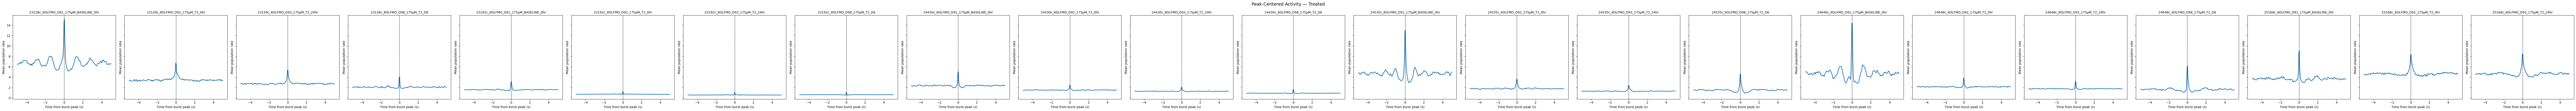

Saved: PeakCenteredActivity_Control.png


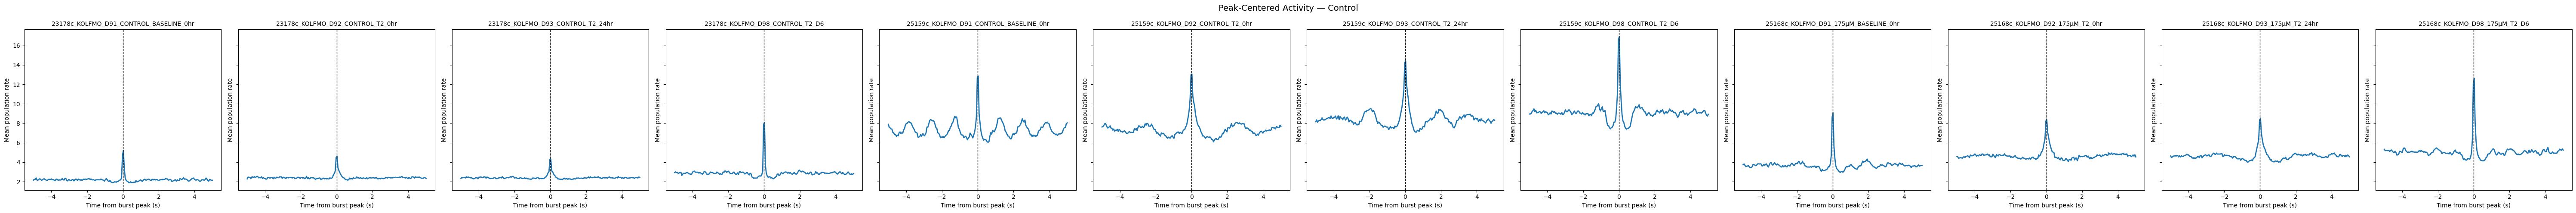

In [35]:
# MaxOne Kolf

import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# Configuration
# ---------------------------
config = {
    "bin_size_ms": 5.0,
    "threshold_rms": 1.7,
    "burst_edge_fraction": 0.5,
    "gauss_win_ms": 17.0,
    "square_win_ms": 5.0,
    "min_dist": 1950.0
}

dataset_groups = {
    "Treated": [
        "23128c_KOLFMO_D91_175µM_BASELINE_0hr",
        "23128c_KOLFMO_D92_175µM_T2_0hr",
        "23128c_KOLFMO_D93_175µM_T2_24hr",
        "23128c_KOLFMO_D98_175µM_T2_D6",
        
        "23192c_KOLFMO_D91_175µM_BASELINE_0hr",
        "23192c_KOLFMO_D92_175µM_T2_0hr",
        "23192c_KOLFMO_D93_175µM_T2_24hr",
        "23192c_KOLFMO_D98_175µM_T2_D6",
        
        "24430c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24430c_KOLFMO_D92_175µM_T2_0hr",
        "24430c_KOLFMO_D93_175µM_T2_24hr",
        "24430c_KOLFMO_D98_175µM_T2_D6",
        
        "24535c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24535c_KOLFMO_D92_175µM_T2_0hr",
        "24535c_KOLFMO_D93_175µM_T2_24hr",
        "24535c_KOLFMO_D98_175µM_T2_D6",
        
        "24648c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24648c_KOLFMO_D92_175µM_T2_0hr",
        "24648c_KOLFMO_D93_175µM_T2_24hr",
        "24648c_KOLFMO_D98_175µM_T2_D6",
        
        "25168c_KOLFMO_D91_175µM_BASELINE_0hr",
        "25168c_KOLFMO_D92_175µM_T2_0hr",
        "25168c_KOLFMO_D93_175µM_T2_24hr"
    ],
    "Control": [
        "23178c_KOLFMO_D91_CONTROL_BASELINE_0hr",
        "23178c_KOLFMO_D92_CONTROL_T2_0hr",
        "23178c_KOLFMO_D93_CONTROL_T2_24hr",
        "23178c_KOLFMO_D98_CONTROL_T2_D6",
        
        "25159c_KOLFMO_D91_CONTROL_BASELINE_0hr",
        "25159c_KOLFMO_D92_CONTROL_T2_0hr",
        "25159c_KOLFMO_D93_CONTROL_T2_24hr",
        "25159c_KOLFMO_D98_CONTROL_T2_D6",
        
        "25168c_KOLFMO_D91_175µM_BASELINE_0hr",  
        "25168c_KOLFMO_D92_175µM_T2_0hr",        
        "25168c_KOLFMO_D93_175µM_T2_24hr",
        "25168c_KOLFMO_D98_175µM_T2_D6"        
    ]
}

# ---------------------------
# Extraction function
# ---------------------------
def plot_peak_centered_activity_grouped_separate(common_times, peak_metrics, save=False, save_dir="peak_plots"):
    """
    Generates one figure per group, with 3-4 adjacent panels each.
    Displays and optionally saves them one at a time to avoid scaling distortion.
    """
    if save:
        os.makedirs(save_dir, exist_ok=True)

    for group_name, datasets in peak_metrics.items():
        num_datasets = len(datasets)
        if num_datasets == 0:
            print(f"Skipping {group_name}: no data available.")
            continue

        # Make each figure large enough for 4 panels
        fig, axes = plt.subplots(1, num_datasets, figsize=(5*num_datasets, 5), sharey=True)
        if num_datasets == 1:
            axes = [axes]

        for ax, (dataset_key, traces) in zip(axes, datasets.items()):
            if traces:
                mean_trace = np.nanmean(np.vstack(traces), axis=0)
                ax.plot(common_times, mean_trace, label=dataset_key, linewidth=2)
                ax.axvline(0, color='k', linestyle='--', linewidth=1)
                ax.set_title(dataset_key, fontsize=10)
            else:
                ax.set_title(f"{dataset_key}\n(No bursts detected)", fontsize=10)

            ax.set_xlabel("Time from burst peak (s)")
            ax.set_ylabel("Mean population rate")

        fig.suptitle(f"Peak-Centered Activity — {group_name}", fontsize=14)
        plt.tight_layout()

        # Save figure
        if save:
            filename = f"PeakCenteredActivity_{group_name.replace(' ', '_')}.png"
            plt.savefig(os.path.join(save_dir, filename), dpi=300)
            print(f"Saved: {filename}")

        plt.show()   # Show one figure at a time


# ---------------------------
# Plotting function
# ---------------------------
def plot_peak_centered_activity_grouped(common_times, peak_metrics):
    """
    Generates one figure per experimental group.
    Each figure contains 3-4 adjacent panels (subplots),
    one for each dataset (timepoint recording) in that group.
    """
    for group_name, datasets in peak_metrics.items():
        num_datasets = len(datasets)
        if num_datasets == 0:
            print(f"Skipping {group_name}: no data available.")
            continue

        fig, axes = plt.subplots(1, num_datasets, figsize=(5*num_datasets, 5), sharey=True)

        if num_datasets == 1:
            axes = [axes]

        for ax, (dataset_key, traces) in zip(axes, datasets.items()):
            if traces:
                mean_trace = np.nanmean(np.vstack(traces), axis=0)
                ax.plot(common_times, mean_trace, label=dataset_key, linewidth=2)
                ax.axvline(0, color='k', linestyle='--', linewidth=1)
                ax.set_title(dataset_key, fontsize=10)
            else:
                ax.set_title(f"{dataset_key}\n(No bursts detected)", fontsize=10)

            ax.set_xlabel("Time from burst peak (s)")
            ax.set_ylabel("Mean population rate")

        fig.suptitle(f"Peak-Centered Activity — {group_name}", fontsize=14)
        plt.tight_layout()
        plt.show()

# ---------------------------
# Run extraction and plotting
# ---------------------------
common_times, peak_metrics = extract_peak_centered_activity_grouped(
    orc, dataset_groups, config=config, window=5.0
)

plot_peak_centered_activity_grouped_separate(common_times, peak_metrics, save=True)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_peak_centered_individual(peak_metrics, common_times):
    """
    Plots all individual peak-centered bursts for Control and Treated groups,
    with mean (solid) and ±1 std (dashed) lines.
    """
    timepoints = ["BASELINE_0hr", "T2_24", "T2_48hr", "T2_72hr", "T2_D4", "T2_D5", "T2_D6"]
    colors = {
        "BASELINE_0hr": "tab:blue",
        "T2_24hr": "tab:orange",
        "T2_72hr": "tab:green",
        "T2_D6": "tab:red"
    }

    fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
    groups = ["Control", "Treated"]

    for ax, group in zip(axes, groups):
        for tp in timepoints:
            if tp in peak_metrics[group] and len(peak_metrics[group][tp]) > 0:
                bursts = np.vstack(peak_metrics[group][tp])  # shape: (n_bursts, n_timepoints)
                mean_trace = np.nanmean(bursts, axis=0)
                std_trace = np.nanstd(bursts, axis=0)

                # Plot all individual bursts (transparent)
                for burst in bursts:
                    ax.plot(common_times, burst, color=colors[tp], alpha=0.2, linewidth=0.8)

                # Plot mean (solid) and std (dashed)
                ax.plot(common_times, mean_trace, color=colors[tp], label=f"{tp}")
                ax.plot(common_times, mean_trace + std_trace, color=colors[tp], linestyle='--', linewidth=1)
                ax.plot(common_times, mean_trace - std_trace, color=colors[tp], linestyle='--', linewidth=1)

        ax.axvline(0, color='k', linestyle='--', linewidth=1)
        ax.set_title(group)
        ax.set_xlabel("Time from burst peak (s)")
        ax.set_ylabel("Population rate (Hz)")
        ax.legend()

    plt.suptitle("Peak-Centered Population Activity with Individual Bursts ± STD")
    plt.tight_layout()
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_peak_centered_individual_split(peak_metrics, common_times):
    """
    Plots all individual peak-centered bursts for Control and Treated in separate panels.
    Adds dashed lines for mean ± std.
    """
    timepoints = ["BASELINE_0hr",  "T2_48hr", "T2_72hr", "T2_D4", "T2_D5", "T2_D6"]
    groups = ["Control", "Treated"]
    colors = {"Control": "blue", "Treated": "red"}

    fig, axes = plt.subplots(len(timepoints), len(groups), figsize=(14, 12), sharex=True, sharey=True)

    for i, tp in enumerate(timepoints):
        for j, group in enumerate(groups):
            ax = axes[i, j]
            bursts = peak_metrics.get(group, {}).get(tp, [])
            if len(bursts) == 0:
                ax.set_title(f"{group} - {tp}\nNo data")
                continue

            bursts = np.vstack(bursts)
            for burst in bursts:
                ax.plot(common_times, burst, color=colors[group], alpha=0.2)

            mean_trace = np.nanmean(bursts, axis=0)
            std_trace = np.nanstd(bursts, axis=0)

            ax.plot(common_times, mean_trace, color=colors[group], linewidth=2)
            ax.plot(common_times, mean_trace + std_trace, color=colors[group], linestyle="--", linewidth=1)
            ax.plot(common_times, mean_trace - std_trace, color=colors[group], linestyle="--", linewidth=1)

            ax.set_title(f"{group} - {tp}")
            if i == len(timepoints) - 1:
                ax.set_xlabel("Time (s, centered on peak)")
            if j == 0:
                ax.set_ylabel("Firing rate (Hz)")

    plt.tight_layout()
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_peak_centered_individual_clean(peak_metrics, common_times):
    """
    Creates a grid of subplots with:
      - Separate panels for each group (Control/Treated) and timepoint
      - All individual bursts (very transparent)
      - Dashed lines for mean ± std
    """
    timepoints = ["BASELINE_0hr", "T2_48hr", "T2_72hr", "T2_D4", "T2_D5", "T2_D6"]
    groups = ["Control", "Treated"]
    colors = {"Control": "blue", "Treated": "red"}

    fig, axes = plt.subplots(len(timepoints), len(groups), figsize=(12, 10), sharex=True, sharey=True)

    for i, tp in enumerate(timepoints):
        for j, group in enumerate(groups):
            ax = axes[i, j]
            bursts = peak_metrics.get(group, {}).get(tp, [])
            if len(bursts) == 0:
                ax.set_title(f"{group} - {tp}\nNo data")
                continue

            bursts = np.vstack(bursts)
            
            # Plot individual bursts with more transparency
            for burst in bursts:
                ax.plot(common_times, burst, color=colors[group], alpha=0.03)

            # Compute mean ± std
            mean_trace = np.nanmean(bursts, axis=0)
            std_trace = np.nanstd(bursts, axis=0)

            # Mean trace
            ax.plot(common_times, mean_trace, color=colors[group], linewidth=2)
            # ±STD as dashed lines
            ax.plot(common_times, mean_trace + std_trace, color=colors[group], linestyle="--", linewidth=1.5)
            ax.plot(common_times, mean_trace - std_trace, color=colors[group], linestyle="--", linewidth=1.5)

            ax.axvline(0, color="black", linestyle="--", linewidth=1)
            ax.set_title(f"{group} - {tp}")
            if i == len(timepoints) - 1:
                ax.set_xlabel("Time (s, centered on peak)")
            if j == 0:
                ax.set_ylabel("Firing rate (Hz)")

    plt.tight_layout()
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_peak_centered_individual_with_legends(peak_metrics, common_times):
    """
    Creates subplots with:
      - Individual bursts (transparent)
      - Mean (bold line)
      - ±STD (dashed)
      - Legend inside each subplot
    """
    timepoints = ["BASELINE_0hr",  "T2_72hr", "T2_D4", "T2_D5", "T2_D6"]
    groups = ["Control", "Treated"]
    colors = {"Control": "blue", "Treated": "red"}

    fig, axes = plt.subplots(len(timepoints), len(groups), figsize=(12, 10), sharex=True, sharey=True)

    for i, tp in enumerate(timepoints):
        for j, group in enumerate(groups):
            ax = axes[i, j]
            bursts = peak_metrics.get(group, {}).get(tp, [])
            if len(bursts) == 0:
                ax.set_title(f"{group} - {tp}\nNo data")
                continue

            bursts = np.vstack(bursts)
            
            # Plot individual bursts (transparent)
            for burst in bursts:
                ax.plot(common_times, burst, color=colors[group], alpha=0.03)

            # Compute mean ± std
            mean_trace = np.nanmean(bursts, axis=0)
            std_trace = np.nanstd(bursts, axis=0)

            # Plot mean (bold)
            mean_line, = ax.plot(common_times, mean_trace, color=colors[group], linewidth=2, label="Mean firing rate")
            # Plot ±STD (dashed)
            std_upper, = ax.plot(common_times, mean_trace + std_trace, color=colors[group], linestyle="--", linewidth=1.5, label="±1 STD")
            ax.plot(common_times, mean_trace - std_trace, color=colors[group], linestyle="--", linewidth=1.5)

            # Peak marker
            ax.axvline(0, color="black", linestyle="--", linewidth=1)

            ax.set_title(f"{group} - {tp}")
            if i == len(timepoints) - 1:
                ax.set_xlabel("Time (s, centered on peak)")
            if j == 0:
                ax.set_ylabel("Firing rate (Hz)")

            # Individual legend inside subplot
            ax.legend(handles=[mean_line, std_upper], loc="upper right", fontsize=8, frameon=False)

    plt.tight_layout()
    plt.show()

common_times, peak_metrics = extract_peak_centered_activity(orc, dataset_groups, config)

plot_peak_centered_individual_with_legends(peak_metrics, common_times)



In [ ]:
# MaxOne Kolf

config = {
    "bin_size_ms": 5.0,
    "threshold_rms": 1.7,
    "burst_edge_fraction": 0.5,
    "gauss_win_ms": 17.0,
    "square_win_ms": 5.0,
    "min_dist": 1950.0
}

dataset_groups = {
    "Control": [
        "23178c_KOLFMO_D91_CONTROL_BASELINE_0hr",
        "23178c_KOLFMO_D92_CONTROL_T2_0hr",
        "23178c_KOLFMO_D93_CONTROL_T2_24hr",
        "23178c_KOLFMO_D98_CONTROL_T2_D6",
        "25159c_KOLFMO_D91_CONTROL_BASELINE_0hr",
        "25159c_KOLFMO_D92_CONTROL_T2_0hr",
        "25159c_KOLFMO_D93_CONTROL_T2_24hr",
        "25159c_KOLFMO_D98_CONTROL_T2_D6"
    ],
    "Treated": [
        "23128c_KOLFMO_D91_175µM_BASELINE_0hr",
        "23128c_KOLFMO_D92_175µM_T2_0hr",
        "23128c_KOLFMO_D93_175µM_T2_24hr",
        "23128c_KOLFMO_D98_175µM_T2_D6",
        "23192c_KOLFMO_D91_175µM_BASELINE_0hr",
        "23192c_KOLFMO_D92_175µM_T2_0hr",
        "23192c_KOLFMO_D93_175µM_T2_24hr",
        "23192c_KOLFMO_D98_175µM_T2_D6",
        "24430c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24430c_KOLFMO_D92_175µM_T2_0hr",
        "24430c_KOLFMO_D93_175µM_T2_24hr",
        "24430c_KOLFMO_D98_175µM_T2_D6",
        "24535c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24535c_KOLFMO_D92_175µM_T2_0hr",
        "24535c_KOLFMO_D93_175µM_T2_24hr",
        "24535c_KOLFMO_D98_175µM_T2_D6",
        "24648c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24648c_KOLFMO_D92_175µM_T2_0hr",
        "24648c_KOLFMO_D93_175µM_T2_24hr",
        "24648c_KOLFMO_D98_175µM_T2_D6",
        "25168c_KOLFMO_D91_175µM_BASELINE_0hr",
        "25168c_KOLFMO_D92_175µM_T2_0hr",
        "25168c_KOLFMO_D93_175µM_T2_24hr",
        "25168c_KOLFMO_D98_175µM_T2_D6"
    ]
}

# Define timepoint order for plotting
timepoint_order = ["BASELINE_0hr", "T2_0hr", "T2_24hr", "T2_D6"]

burst_widths = extract_all_burst_widths(orc, dataset_groups, config)
plot_burst_width_violins(burst_widths)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

def plot_peak_centered_individual_with_legends(peak_metrics, common_times):
    """
    Creates subplots with:
      - Individual bursts (transparent)
      - Mean (bold line)
      - ±STD (dashed)
      - Legend inside each subplot
    """
    timepoints = ["BASELINE_0hr", "T2_24hr", "T2_48hr", "T2_72hr", "T2_D4", "T2_D5", "T2_D6"]
    groups = ["Control", "Treated"]
    colors = {"Control": "blue", "Treated": "red"}

    n_timepoints = len(timepoints)
    n_cols = len(groups)
    n_rows = n_timepoints

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 3*n_rows), sharex=True, sharey=True)
    axes = np.array(axes).reshape(n_rows, n_cols)

    for i, tp in enumerate(timepoints):
        for j, group in enumerate(groups):
            ax = axes[i, j]
            bursts = peak_metrics.get(group, {}).get(tp, [])
            if len(bursts) == 0:
                ax.set_title(f"{group} - {tp}\nNo data")
                continue

            bursts = np.vstack(bursts)

            # Plot individual bursts (transparent)
            for burst in bursts:
                ax.plot(common_times, burst, color=colors[group], alpha=0.03)

            # Compute mean ± std
            mean_trace = np.nanmean(bursts, axis=0)
            std_trace = np.nanstd(bursts, axis=0)

            # Plot mean and ±STD
            mean_line, = ax.plot(common_times, mean_trace, color=colors[group], linewidth=2, label="Mean firing rate")
            std_upper, = ax.plot(common_times, mean_trace + std_trace, color=colors[group], linestyle="--", linewidth=1.5, label="±1 STD")
            ax.plot(common_times, mean_trace - std_trace, color=colors[group], linestyle="--", linewidth=1.5)

            # Peak marker
            ax.axvline(0, color="black", linestyle="--", linewidth=1)

            ax.set_title(f"{group} - {tp}")
            if i == n_timepoints - 1:
                ax.set_xlabel("Time (s, centered on peak)")
            if j == 0:
                ax.set_ylabel("Firing rate (Hz)")

            # Legend
            ax.legend(handles=[mean_line, std_upper], loc="upper right", fontsize=8, frameon=False)

    plt.tight_layout()
    plt.show()
common_times, peak_metrics = extract_peak_centered_activity(orc, dataset_groups, config)

plot_peak_centered_individual_with_legends(peak_metrics, common_times)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

def plot_peak_centered_activity(common_times, peak_metrics):
    timepoints = ["BASELINE_0hr", "T2_0hr", "T2_24hr", "T2_D6"]
    
    n_timepoints = len(timepoints)
    
    # Automatically determine number of rows and columns
    n_cols = 4 if n_timepoints > 4 else n_timepoints
    n_rows = math.ceil(n_timepoints / n_cols)
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 4*n_rows), sharey=True)
    axes = np.array(axes).reshape(-1)  # Flatten axes for easy indexing

    for i, tp in enumerate(timepoints):
        ax = axes[i]
        for group, group_data in peak_metrics.items():
            if tp in group_data and len(group_data[tp]) > 0:
                data = np.nanmean(np.vstack(group_data[tp]), axis=0)
                ax.plot(common_times, data, label=group)
        
        ax.axvline(0, color='k', linestyle='--')
        ax.set_title(tp)
        ax.set_xlabel("Time from burst peak (s)")
        if i % n_cols == 0:
            ax.set_ylabel("Mean population rate")
        ax.legend()
    
    # Hide unused axes if timepoints < grid size
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()
common_times, peak_metrics = extract_peak_centered_activity(orc, dataset_groups, config)

plot_peak_centered_activity(common_times, peak_metrics)


Saved: PeakCenteredOverlay_Treated.png


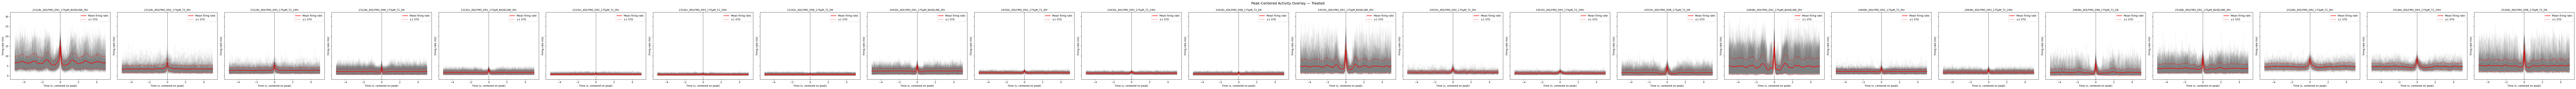

Saved: PeakCenteredOverlay_Control.png


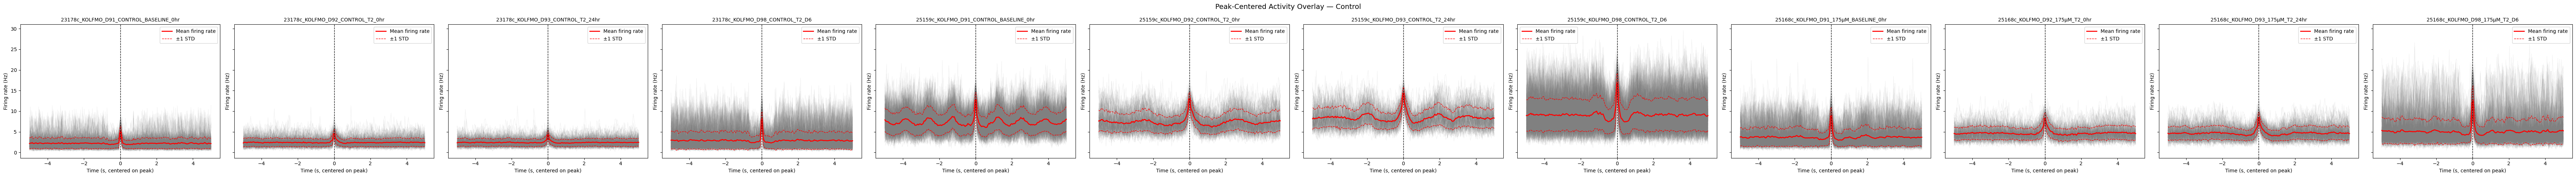

In [36]:
# ===============================
# Configuration and Datasets
# ===============================
import numpy as np
import matplotlib.pyplot as plt
import math
import os

config = {
    "bin_size_ms": 5.0,
    "threshold_rms": 1.7,
    "burst_edge_fraction": 0.5,
    "gauss_win_ms": 17.0,
    "square_win_ms": 5.0,
    "min_dist": 1950.0
}

dataset_groups = {
    "Treated": [
        "23128c_KOLFMO_D91_175µM_BASELINE_0hr",
        "23128c_KOLFMO_D92_175µM_T2_0hr",
        "23128c_KOLFMO_D93_175µM_T2_24hr",
        "23128c_KOLFMO_D98_175µM_T2_D6",

        "23192c_KOLFMO_D91_175µM_BASELINE_0hr",
        "23192c_KOLFMO_D92_175µM_T2_0hr",
        "23192c_KOLFMO_D93_175µM_T2_24hr",
        "23192c_KOLFMO_D98_175µM_T2_D6",

        "24430c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24430c_KOLFMO_D92_175µM_T2_0hr",
        "24430c_KOLFMO_D93_175µM_T2_24hr",
        "24430c_KOLFMO_D98_175µM_T2_D6",

        "24535c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24535c_KOLFMO_D92_175µM_T2_0hr",
        "24535c_KOLFMO_D93_175µM_T2_24hr",
        "24535c_KOLFMO_D98_175µM_T2_D6",

        "24648c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24648c_KOLFMO_D92_175µM_T2_0hr",
        "24648c_KOLFMO_D93_175µM_T2_24hr",
        "24648c_KOLFMO_D98_175µM_T2_D6",

        "25168c_KOLFMO_D91_175µM_BASELINE_0hr",
        "25168c_KOLFMO_D92_175µM_T2_0hr",
        "25168c_KOLFMO_D93_175µM_T2_24hr",
        "25168c_KOLFMO_D98_175µM_T2_D6"
    ],
    "Control": [
        "23178c_KOLFMO_D91_CONTROL_BASELINE_0hr",
        "23178c_KOLFMO_D92_CONTROL_T2_0hr",
        "23178c_KOLFMO_D93_CONTROL_T2_24hr",
        "23178c_KOLFMO_D98_CONTROL_T2_D6",

        "25159c_KOLFMO_D91_CONTROL_BASELINE_0hr",
        "25159c_KOLFMO_D92_CONTROL_T2_0hr",
        "25159c_KOLFMO_D93_CONTROL_T2_24hr",
        "25159c_KOLFMO_D98_CONTROL_T2_D6",

        "25168c_KOLFMO_D91_175µM_BASELINE_0hr",
        "25168c_KOLFMO_D92_175µM_T2_0hr",
        "25168c_KOLFMO_D93_175µM_T2_24hr",
        "25168c_KOLFMO_D98_175µM_T2_D6"
    ]
}

# ===============================
# Extraction Function
# ===============================
def extract_peak_centered_activity_grouped_overlay(orc, dataset_groups, config=None, window=5.0):
    all_metrics = {}
    common_times = np.linspace(-window, window, 200)

    for group_name, datasets in dataset_groups.items():
        all_metrics[group_name] = {}

        for dataset_key in datasets:
            if dataset_key not in orc.spike_data:
                print(f"Skipping missing dataset: {dataset_key}")
                continue

            detector = orc.get_burst_detector(dataset_key, config)
            times, smoothed, peaks, peak_times, bursts, burst_windows = detector.compute_population_rate_and_bursts()
            if len(peaks) == 0:
                print(f"No peaks found for {dataset_key}")
                continue

            aligned_traces = []
            for p in peak_times:
                mask = (times >= p - window) & (times <= p + window)
                if np.any(mask):
                    t_segment = times[mask] - p
                    rate_segment = smoothed[mask]
                    interp = np.interp(common_times, t_segment, rate_segment, left=np.nan, right=np.nan)
                    aligned_traces.append(interp)

            if len(aligned_traces) > 0:
                all_metrics[group_name][dataset_key] = np.vstack(aligned_traces)

    return common_times, all_metrics

# ===============================
# Plotting Function
# ===============================
def plot_peak_centered_activity_overlay_grouped(common_times, peak_metrics, save=False, save_dir="peak_overlay_plots"):
    if save:
        os.makedirs(save_dir, exist_ok=True)

    for group_name, datasets in peak_metrics.items():
        num_datasets = len(datasets)
        if num_datasets == 0:
            print(f"Skipping {group_name}: no data available.")
            continue

        fig, axes = plt.subplots(1, num_datasets, figsize=(6*num_datasets, 5), sharey=True)
        if num_datasets == 1:
            axes = [axes]

        for ax, (dataset_key, traces) in zip(axes, datasets.items()):
            if traces.shape[0] > 0:
                # Overlay all bursts
                for row in traces:
                    ax.plot(common_times, row, color='gray', alpha=0.1, linewidth=0.8)

                # Mean and std
                mean_trace = np.nanmean(traces, axis=0)
                std_trace = np.nanstd(traces, axis=0)

                ax.plot(common_times, mean_trace, color='red', linewidth=2, label='Mean firing rate')
                ax.plot(common_times, mean_trace + std_trace, color='red', linestyle='--', linewidth=1, label='±1 STD')
                ax.plot(common_times, mean_trace - std_trace, color='red', linestyle='--', linewidth=1)

            ax.axvline(0, color='k', linestyle='--', linewidth=1)
            ax.set_title(dataset_key, fontsize=10)
            ax.set_xlabel("Time (s, centered on peak)")
            ax.set_ylabel("Firing rate (Hz)")
            ax.legend()

        fig.suptitle(f"Peak-Centered Activity Overlay — {group_name}", fontsize=14)
        plt.tight_layout()

        if save:
            filename = f"PeakCenteredOverlay_{group_name.replace(' ', '_')}.png"
            plt.savefig(os.path.join(save_dir, filename), dpi=300)
            print(f"Saved: {filename}")

        plt.show()

# ===============================
# Run Extraction and Plotting
# ===============================
common_times, peak_metrics = extract_peak_centered_activity_grouped_overlay(
    orc, dataset_groups, config=config, window=5.0
)

plot_peak_centered_activity_overlay_grouped(common_times, peak_metrics, save=True)


Saved: PeakCenteredOverlay_Treated.png


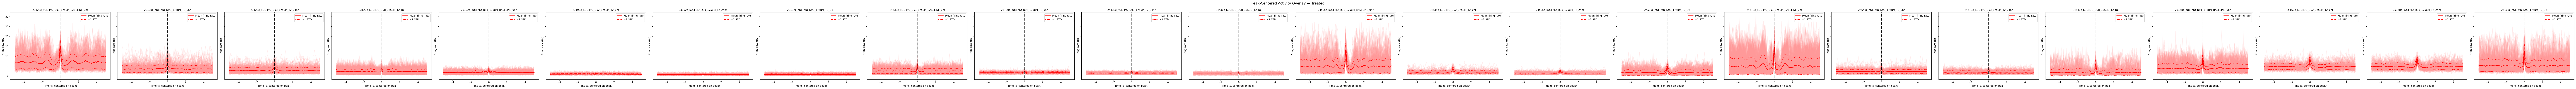

Saved: PeakCenteredOverlay_Control.png


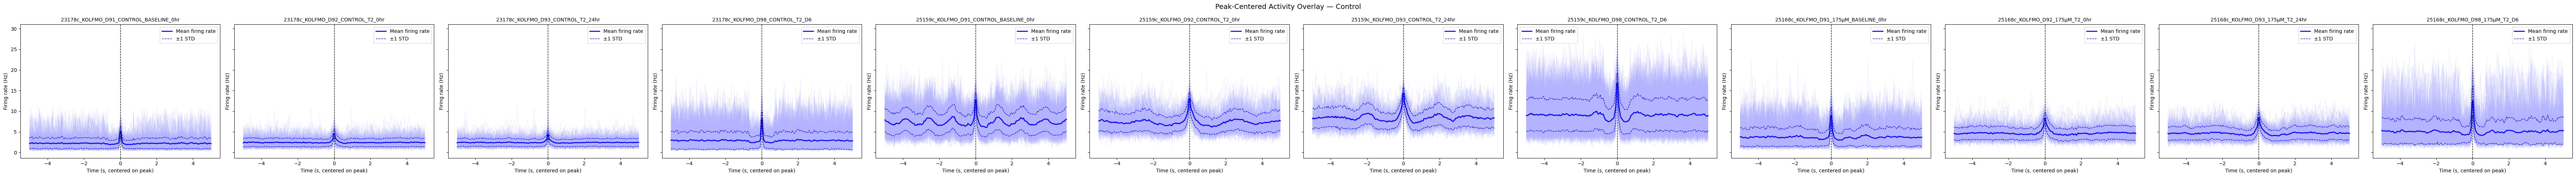

In [37]:
# ===============================
# Configuration and Datasets
# ===============================
import numpy as np
import matplotlib.pyplot as plt
import math
import os

config = {
    "bin_size_ms": 5.0,
    "threshold_rms": 1.7,
    "burst_edge_fraction": 0.5,
    "gauss_win_ms": 17.0,
    "square_win_ms": 5.0,
    "min_dist": 1950.0
}

dataset_groups = {
    "Treated": [
        "23128c_KOLFMO_D91_175µM_BASELINE_0hr",
        "23128c_KOLFMO_D92_175µM_T2_0hr",
        "23128c_KOLFMO_D93_175µM_T2_24hr",
        "23128c_KOLFMO_D98_175µM_T2_D6",

        "23192c_KOLFMO_D91_175µM_BASELINE_0hr",
        "23192c_KOLFMO_D92_175µM_T2_0hr",
        "23192c_KOLFMO_D93_175µM_T2_24hr",
        "23192c_KOLFMO_D98_175µM_T2_D6",

        "24430c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24430c_KOLFMO_D92_175µM_T2_0hr",
        "24430c_KOLFMO_D93_175µM_T2_24hr",
        "24430c_KOLFMO_D98_175µM_T2_D6",

        "24535c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24535c_KOLFMO_D92_175µM_T2_0hr",
        "24535c_KOLFMO_D93_175µM_T2_24hr",
        "24535c_KOLFMO_D98_175µM_T2_D6",

        "24648c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24648c_KOLFMO_D92_175µM_T2_0hr",
        "24648c_KOLFMO_D93_175µM_T2_24hr",
        "24648c_KOLFMO_D98_175µM_T2_D6",

        "25168c_KOLFMO_D91_175µM_BASELINE_0hr",
        "25168c_KOLFMO_D92_175µM_T2_0hr",
        "25168c_KOLFMO_D93_175µM_T2_24hr",
        "25168c_KOLFMO_D98_175µM_T2_D6"
    ],
    "Control": [
        "23178c_KOLFMO_D91_CONTROL_BASELINE_0hr",
        "23178c_KOLFMO_D92_CONTROL_T2_0hr",
        "23178c_KOLFMO_D93_CONTROL_T2_24hr",
        "23178c_KOLFMO_D98_CONTROL_T2_D6",

        "25159c_KOLFMO_D91_CONTROL_BASELINE_0hr",
        "25159c_KOLFMO_D92_CONTROL_T2_0hr",
        "25159c_KOLFMO_D93_CONTROL_T2_24hr",
        "25159c_KOLFMO_D98_CONTROL_T2_D6",

        "25168c_KOLFMO_D91_175µM_BASELINE_0hr",
        "25168c_KOLFMO_D92_175µM_T2_0hr",
        "25168c_KOLFMO_D93_175µM_T2_24hr",
        "25168c_KOLFMO_D98_175µM_T2_D6"
    ]
}

# ===============================
# Extraction Function
# ===============================
def extract_peak_centered_activity_grouped_overlay(orc, dataset_groups, config=None, window=5.0):
    all_metrics = {}
    common_times = np.linspace(-window, window, 200)

    for group_name, datasets in dataset_groups.items():
        all_metrics[group_name] = {}

        for dataset_key in datasets:
            if dataset_key not in orc.spike_data:
                print(f"Skipping missing dataset: {dataset_key}")
                continue

            detector = orc.get_burst_detector(dataset_key, config)
            times, smoothed, peaks, peak_times, bursts, burst_windows = detector.compute_population_rate_and_bursts()
            if len(peaks) == 0:
                print(f"No peaks found for {dataset_key}")
                continue

            aligned_traces = []
            for p in peak_times:
                mask = (times >= p - window) & (times <= p + window)
                if np.any(mask):
                    t_segment = times[mask] - p
                    rate_segment = smoothed[mask]
                    interp = np.interp(common_times, t_segment, rate_segment, left=np.nan, right=np.nan)
                    aligned_traces.append(interp)

            if len(aligned_traces) > 0:
                all_metrics[group_name][dataset_key] = np.vstack(aligned_traces)

    return common_times, all_metrics

# ===============================
# Colored Plotting Function
# ===============================
def plot_peak_centered_activity_overlay_grouped_colored(common_times, peak_metrics, save=False, save_dir="peak_overlay_plots_colored"):
    if save:
        os.makedirs(save_dir, exist_ok=True)

    color_map = {
        "Control": "blue",
        "Treated": "red"
    }

    for group_name, datasets in peak_metrics.items():
        num_datasets = len(datasets)
        if num_datasets == 0:
            print(f"Skipping {group_name}: no data available.")
            continue

        fig, axes = plt.subplots(1, num_datasets, figsize=(6*num_datasets, 5), sharey=True)
        if num_datasets == 1:
            axes = [axes]

        group_color = color_map.get(group_name, "black")
        light_color = (0.7, 0.7, 1.0, 0.05) if group_name == "Control" else (1.0, 0.6, 0.6, 0.05)

        for ax, (dataset_key, traces) in zip(axes, datasets.items()):
            if traces.shape[0] > 0:
                # Overlay all bursts with transparent group color
                for row in traces:
                    ax.plot(common_times, row, color=light_color, alpha=0.2, linewidth=0.8)

                # Mean and std
                mean_trace = np.nanmean(traces, axis=0)
                std_trace = np.nanstd(traces, axis=0)

                ax.plot(common_times, mean_trace, color=group_color, linewidth=2, label='Mean firing rate')
                ax.plot(common_times, mean_trace + std_trace, color=group_color, linestyle='--', linewidth=1, label='±1 STD')
                ax.plot(common_times, mean_trace - std_trace, color=group_color, linestyle='--', linewidth=1)

            ax.axvline(0, color='k', linestyle='--', linewidth=1)
            ax.set_title(dataset_key, fontsize=10)
            ax.set_xlabel("Time (s, centered on peak)")
            ax.set_ylabel("Firing rate (Hz)")
            ax.legend()

        fig.suptitle(f"Peak-Centered Activity Overlay — {group_name}", fontsize=14)
        plt.tight_layout()

        if save:
            filename = f"PeakCenteredOverlay_{group_name.replace(' ', '_')}.png"
            plt.savefig(os.path.join(save_dir, filename), dpi=300)
            print(f"Saved: {filename}")

        plt.show()

# ===============================
# Run Extraction and Plotting
# ===============================
common_times, peak_metrics = extract_peak_centered_activity_grouped_overlay(
    orc, dataset_groups, config=config, window=5.0
)

plot_peak_centered_activity_overlay_grouped_colored(common_times, peak_metrics, save=True)
